## Import packages

In [1]:
# !pip install gensim
# !pip install nltk
# import nltk
# nltk.download('punkt')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer, StandardScaler
from sklearn.impute import KNNImputer
from gensim.models import KeyedVectors
from gensim import models
from collections import Counter
import nltk
import ast
import joblib
from nltk.sentiment import SentimentIntensityAnalyzer

## Read data

In [3]:
# Loading all the CSV files
file_paths = [
    'Yearly\movies2013.csv',
    'Yearly\movies2014.csv',
    'Yearly\movies2015.csv',
    'Yearly\movies2016.csv',
    'Yearly\movies2017.csv',
    'Yearly\movies2018.csv',
    'Yearly\movies2019.csv',
    'Yearly\movies2020.csv',
    'Yearly\movies2021.csv',
    'Yearly\movies2022.csv',
    'Yearly\movies2023.csv'
 ]



# Reading all CSV files into dataframes
dataframes = [pd.read_csv(file) for file in file_paths]

# Merging all dataframes into a single dataframe and dropping duplicates
TMDB_df = pd.concat(dataframes)
TMDB_df.drop_duplicates(subset=['imdb_id'], keep='first', inplace=True)
TMDB_df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,cast
0,False,/c7U9Fuy74WLp7gFAdpQJHn2T2no.jpg,NaN,195000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://jackthegiantkiller.warnerbros.com,81005,tt1351685,en,Jack the Giant Slayer,...,114,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare for a giant adventure,Jack the Giant Slayer,False,5.800,4690,"['based on fairy tale', 'giant']","['Eleanor Tomlinson', 'Nicholas Hoult', 'Ewan ..."
1,False,/mV1HOCbUqx7nfFPwledYsvMYHrw.jpg,"{'id': 1570, 'name': 'Die Hard Collection', 'p...",92000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://www.diehardmovie.com/,47964,tt1606378,en,A Good Day to Die Hard,...,98,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Yippee Ki-Yay Mother Russia,A Good Day to Die Hard,False,5.328,6099,"['cia', 'escape', 'bomb', 'courthouse', 'agent...","['Bruce Willis', 'Jai Courtney', 'Sebastian Ko..."
2,False,/eoIQMUeJDOG41way1pb5TjiPFFf.jpg,"{'id': 111751, 'name': 'Texas Chainsaw Massacr...",10000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,76617,tt1572315,en,Texas Chainsaw 3D,...,92,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Evil wears many faces.,Texas Chainsaw 3D,False,5.470,1551,"['home', 'gore', 'sequel', 'leatherface', 'sla...","['Alexandra Daddario', 'Dan Yeager', 'Trey Son..."
3,False,/mJSe5dxKu8Sq0GfdjdWVqdGvzfV.jpg,NaN,50000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",NaN,60304,tt1428538,en,Hansel & Gretel: Witch Hunters,...,88,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Classic tale. New twist.,Hansel & Gretel: Witch Hunters,False,6.034,6367,"['witch', 'gun', 'black magic', 'troll', 'stea...","['Jeremy Renner', 'Gemma Arterton', 'Famke Jan..."
4,False,/mgnMFeLCEaNTOiD7w2DOaqzddyJ.jpg,"{'id': 251937, 'name': 'A Haunted House Collec...",2500000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,139038,tt2243537,en,A Haunted House,...,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This $*%! ain't paranormal.,A Haunted House,False,5.869,1732,"['ghostbuster', 'haunted house', 'parody', 'cr...","['Marlon Wayans', 'Essence Atkins', 'Nick Swar..."


In [4]:
MOJO_df = pd.read_csv('Additional_Data\gross_earnings_domestic_2013-2023.csv').rename(columns={'daily earnings':'gross_earnings_domestic'})
MOJO_df.head()

,movie,gross_earnings_domestic,theatres,earnings_per_theatre
0,'71,1270847.0,3681.0,345.245042
1,'83,4055672.0,8605.0,471.315747
2,'85: The Greatest Team in Football History,124573.0,236.0,527.851695
3,10 Cloverfield Lane,72082998.0,117138.0,615.368181
4,10.000 Km,12423.0,77.0,161.337662


In [5]:
youtube=pd.read_csv('Additional_Data\Youtube_Movie_Data.csv')
youtube.head()

,MovieTitle,YouTube Video Title,YouTube Video ID,Views,Likes,Comments,Top 10 Comments
0,'71,&#39;71 Official Trailer #1 (2015) - Jack O&#3...,J-BaKfl1Ms4,1808230,5232,538,Jack o' Connell is quickly becoming that actor...
1,10 Cloverfield Lane,10 Cloverfield Lane Official Trailer #1 (2016)...,saHzng8fxLs,11549803,44246,6538,Just saw this gem. You gotta love John Goodman...
2,10x10,"10X10 Official Trailer (2018) Luke Evans, Kell...",zV1eUEPEPPM,868257,1690,156,jesus... Luke evans. I really hope he gets oth...
3,12 Strong,12 STRONG - Official Trailer,-Denciie5oA,18053617,120913,6949,The movie could have ended earlier if he broug...
4,12 Years a Slave,12 YEARS A SLAVE - Official Trailer (HD),z02Ie8wKKRg,8396503,39660,4485,"This movie was one of the most moving, emotion..."


In [6]:
tomato=pd.read_csv('Additional_Data\Tomato_Score.csv')
tomato.head()

,Movie,Specific Rotten Tomato Score
0,Jack the Giant Slayer,52.0
1,A Good Day to Die Hard,15.0
2,Texas Chainsaw 3D,19.0
3,Hansel & Gretel: Witch Hunters,16.0
4,A Haunted House,8.0


## General info. of dataset

In [7]:
TMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173551 entries, 0 to 32568
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   adult                  173551 non-null  bool   
 1   backdrop_path          83049 non-null   object 
 2   belongs_to_collection  5545 non-null    object 
 3   budget                 173551 non-null  int64  
 4   genres                 173551 non-null  object 
 5   homepage               39636 non-null   object 
 6   id                     173551 non-null  int64  
 7   imdb_id                173550 non-null  object 
 8   original_language      173551 non-null  object 
 9   original_title         173551 non-null  object 
 10  overview               160483 non-null  object 
 11  popularity             173551 non-null  float64
 12  poster_path            155298 non-null  object 
 13  production_companies   173551 non-null  object 
 14  production_countries   173551 non-nul

In [8]:
TMDB_df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'keywords', 'cast'],
      dtype='object')

In [9]:
TMDB_df.shape

(173551, 27)

In [10]:
#filter in only rows with non-zero revenue
TMDB_df = TMDB_df[TMDB_df['revenue']!=0]
TMDB_df.shape

(5818, 27)

In [11]:
TMDB_df.loc[TMDB_df['title']==TMDB_df['original_title'],['title','original_title']]

,title,original_title
0,Jack the Giant Slayer,Jack the Giant Slayer
1,A Good Day to Die Hard,A Good Day to Die Hard
2,Texas Chainsaw 3D,Texas Chainsaw 3D
3,Hansel & Gretel: Witch Hunters,Hansel & Gretel: Witch Hunters
4,A Haunted House,A Haunted House
...,...,...
28427,The Disappearance of Shere Hite,The Disappearance of Shere Hite
28446,All Dirt Roads Taste of Salt,All Dirt Roads Taste of Salt
29447,Manduka,Manduka
29597,The Ladykiller,The Ladykiller


In [12]:
TMDB_df.loc[TMDB_df['title']!=TMDB_df['original_title'],['title','original_title']]

,title,original_title
10,3096 Days,3096 Tage
20,The Grandmaster,一代宗師
30,Hunter x Hunter: Phantom Rouge,劇場版 HUNTER×HUNTER 緋色の幻影
34,The Best Offer,La migliore offerta
36,Journey to the West: Conquering the Demons,西游·降魔篇
...,...,...
27829,Godzilla Minus One,ゴジラ-1.0
28088,The Taste of Things,La passion de Dodin Bouffant
28173,In Broad Daylight,白日之下
28281,Menus-Plaisirs Les Troisgros,Menus Plaisirs – Les Troisgros


Some rows in TMDB df have rows where the movie title changes

In [13]:
#Check # of rows that are the same movie before merging
MOJO_set = (set(MOJO_df["movie"].to_list()))
TMDB_set = set((TMDB_df["title"].to_list()))
print(f'Total movies in both dataframes: {len(MOJO_set.intersection(TMDB_set))}')

Total movies in both dataframes: 2105


In [14]:
#Check # of rows that are the same movie before merging
MOJO_set = (set(MOJO_df["movie"].to_list()))
TMDB_set = set((TMDB_df["original_title"].to_list()))
print(f'Total movies in both dataframes: {len(MOJO_set.intersection(TMDB_set))}')

Total movies in both dataframes: 1889


In [15]:
# Create sets of movie names from both DataFrames
movie_names_df1 = set(MOJO_set)
movie_names_df2 = set(TMDB_set)

# Find movie names that are unique to each DataFrame
unique_to_df1 = movie_names_df1 - movie_names_df2
unique_to_df2 = movie_names_df2 - movie_names_df1

# Print the movie names unique to each DataFrame
print("Movies unique to MOJO_set:", unique_to_df1)

Movies unique to MOJO_set: {'Ghost Team', 'The Players', 'Titanic', 'The Fall of the American Empire', 'Echo in the Canyon', 'My Happy Ending', 'Unfavorable Odds', 'Dating & New York', 'P Storm', 'Mission Mangal', 'Locked-in Society', 'Top Gun', 'Los Domirriqueños 2', 'The Polar Express', 'A New Old Play', 'South Pacific', 'Malum', 'Sound! Euphonium the Movie - Our Promise: A Brand New Day', 'Highway', 'Cinco de Mayo, La Batalla', 'Carter High', 'Little Italy', 'Sollers Point', 'Standing Tall', 'Earwig and the Witch', 'Before the Sunset', 'Werckmeister Harmonies', 'The Hit', 'Mazinger Z: INFINITY', 'Viper Club', 'The Quiet One', 'My All-American', 'City of Women', 'Far from Vietnam', 'Metal Messiah', 'National Theatre Live: Julius Caesar', 'The Giant Spider Invasion', 'Kingsglaive: Final Fantasy XV', 'You Are Here: A Come From Away Story', 'Christmas Jars', "Irving Berlin's Holiday Inn The Broadway Musical", 'The Thousand Faces of Dunjia', 'Heat and Dust', 'Apparition Hill', 'Diane', '

In [16]:
#Merge on 'title' and assign dataframe to merged_title
merged_title = pd.merge(MOJO_df,TMDB_df,left_on='movie',right_on='title',how='inner')

#Merge on 'original_title' and assign dataframe to merged_original_title
merged_original_title = pd.merge(MOJO_df,TMDB_df,left_on='movie',right_on='original_title',how='inner')

#Concat the two dataframes by row and remove duplicates
merged_df = pd.concat([merged_title,merged_original_title],axis=0)

#Merge rotten tomatoes data
merged_df = pd.merge(merged_df,tomato,left_on='movie',right_on='Movie',how='inner').drop(['Movie'],axis=1)

#Merge youtube data
merged_df = pd.merge(merged_df,youtube,left_on='movie',right_on='MovieTitle',how='inner').drop(['MovieTitle'],axis=1)

#Drop duplicated rows
merged_df.drop_duplicates(subset=['movie'], keep='first', inplace=True)
merged_df = merged_df.reset_index(drop=True)

In [17]:
def get_collection(x):
    if x is np.nan:
        return x
    else:
        x = x.replace("'",'"').replace('[','').replace(']','')
        name_start = x.find('"name":')
        poster_path_start = x.find('"poster_path":')
        
        if '"' in x[name_start+9:poster_path_start-3]:
            parsed_x = x[:name_start+9] + x[name_start+9:poster_path_start-3].replace('"',"'") + x[poster_path_start-3:]
            
            if 'None' in x:
                return json.loads(parsed_x.replace('None','null'))['name']
            else:
                return json.loads(parsed_x)['name']            
        else:
            if 'None' in x:
                return json.loads(x.replace('None','null'))['name']
            else:
                return json.loads(x)['name']

def get_genres(x):
    if x is np.nan:
        return x
    else:
        if '[' in x:
            genres_list = []
            x= x.replace("'",'"')
            for i in range(len(json.loads(x))):
                genres_list.append(json.loads(x)[i]['name'])
            return genres_list
        else:
            return [x]
        
def get_production_companies(x):
    if (x == '[]')|(x is np.nan):
        return np.nan
    elif '[' in x:
        prod_comp_list = []
        for data_list in ast.literal_eval(x):
            prod_comp_list.append(data_list['name'])
        return prod_comp_list
    else:
        return [x]

def get_spoken_language(x):
    if (x == '[]')|(x is np.nan):
        return np.nan
    elif '[' in x:
        prod_comp_list = []
        for data_list in ast.literal_eval(x):
            prod_comp_list.append(data_list['iso_639_1'])
        return prod_comp_list
    else:
        return [x]

def get_keywords(x):
    if (x == '[]')|(x is np.nan):
        return np.nan
    elif '[' in x:
        return ast.literal_eval(x)
    else:
        return [x]

def get_cast(x):
    if (x == '[]')|(x is np.nan):
        return np.nan
    elif '[' in x:
        return ast.literal_eval(x)
    else:
        return [x]

def convert_date_string_to_datetime(date_string):
    try:
        return pd.to_datetime(date_string, errors='coerce')
    except:
        return None
nltk.download('vader_lexicon')  
sia = SentimentIntensityAnalyzer()
def calculate_sentiment(comment):
    if pd.notna(comment):
        return sia.polarity_scores(comment)['compound']
    else:
        return None

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anson\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
def process_data(df):
    """
    convert json columns into lists and return dataframe with processed data
    """
    processed_df = df.copy()
    
    #Drop irrelevant columns:
    #Columns 'adult', 'status', and 'video' are dropped because they all have the same values across all rows
    processed_df = processed_df.drop(['adult','backdrop_path','homepage','id','imdb_id','original_title',
                                      'poster_path','status','title','video','YouTube Video Title','YouTube Video ID'],axis=1)
    
    #Fix columns that are in json format
    processed_df['belongs_to_collection'] = processed_df['belongs_to_collection'].apply(get_collection)
    processed_df['genres'] = processed_df['genres'].apply(get_genres)
    processed_df['production_companies'] = processed_df['production_companies'].apply(get_production_companies)
    processed_df['production_countries'] = processed_df['production_countries'].apply(get_production_companies)
    processed_df['release_date'] = processed_df['release_date'].apply(convert_date_string_to_datetime)
    processed_df['spoken_languages'] = processed_df['spoken_languages'].apply(get_spoken_language)
    processed_df['keywords'] = processed_df['keywords'].apply(get_keywords)
    processed_df['cast'] = processed_df['cast'].apply(get_cast)
    #Add in the sentimental score from VADER
    processed_df['Sentimental_Score']=processed_df['Top 10 Comments'].apply(calculate_sentiment)
    return processed_df

In [19]:
##Budget has a lot of 0 rows

In [20]:
processed_df = process_data(merged_df)
processed_df.head()

,movie,gross_earnings_domestic,theatres,earnings_per_theatre,belongs_to_collection,budget,genres,original_language,overview,popularity,...,vote_average,vote_count,keywords,cast,Specific Rotten Tomato Score,Views,Likes,Comments,Top 10 Comments,Sentimental_Score
0,'71,1270847.0,3681.0,345.245042,NaN,11000000,"[Thriller, Action, Drama, War]",en,A young British soldier must find his way back...,18.269,...,6.786,1038,"[1970s, riot, northern ireland, survival, sold...","[Jack O'Connell, Sean Harris, Paul Anderson, S...",96.0,1808230,5232,538,Jack o' Connell is quickly becoming that actor...,0.9912
1,10 Cloverfield Lane,72082998.0,117138.0,615.368181,NaN,15000000,"[Thriller, Science Fiction, Drama, Horror]",en,"After getting in a car accident, a woman is he...",55.182,...,6.983,7442,"[kidnapping, paranoia, bunker, basement, survi...","[Mary Elizabeth Winstead, John Goodman, John G...",90.0,11549803,44246,6538,Just saw this gem. You gotta love John Goodman...,0.9964
2,10x10,2263.0,70.0,32.328571,NaN,0,[Thriller],en,"Lewis is an outwardly ordinary guy, but in rea...",20.945,...,5.247,508,"[kidnapping, revenge]","[Luke Evans, Kelly Reilly, Noel Clarke, Olivia...",67.0,868257,1690,156,jesus... Luke evans. I really hope he gets oth...,0.9920
3,12 Strong,45500164.0,88991.0,511.289501,NaN,35000000,"[War, Drama, Action, History]",en,A team of special forces head into Afghanistan...,46.287,...,6.278,2730,"[cia, based on novel or book, afghanistan, bas...","[Chris Hemsworth, Michael Shannon, Michael Peñ...",50.0,18053617,120913,6949,The movie could have ended earlier if he broug...,0.9896
4,12 Years a Slave,56634802.0,110810.0,511.098294,NaN,20000000,"[Drama, History]",en,"In the pre-Civil War United States, Solomon No...",43.059,...,7.946,10695,"[slavery, plantation, based on memoir or autob...","[Chiwetel Ejiofor, Michael Fassbender, Lupita ...",95.0,8396503,39660,4485,"This movie was one of the most moving, emotion...",-0.9861


<AxesSubplot:>

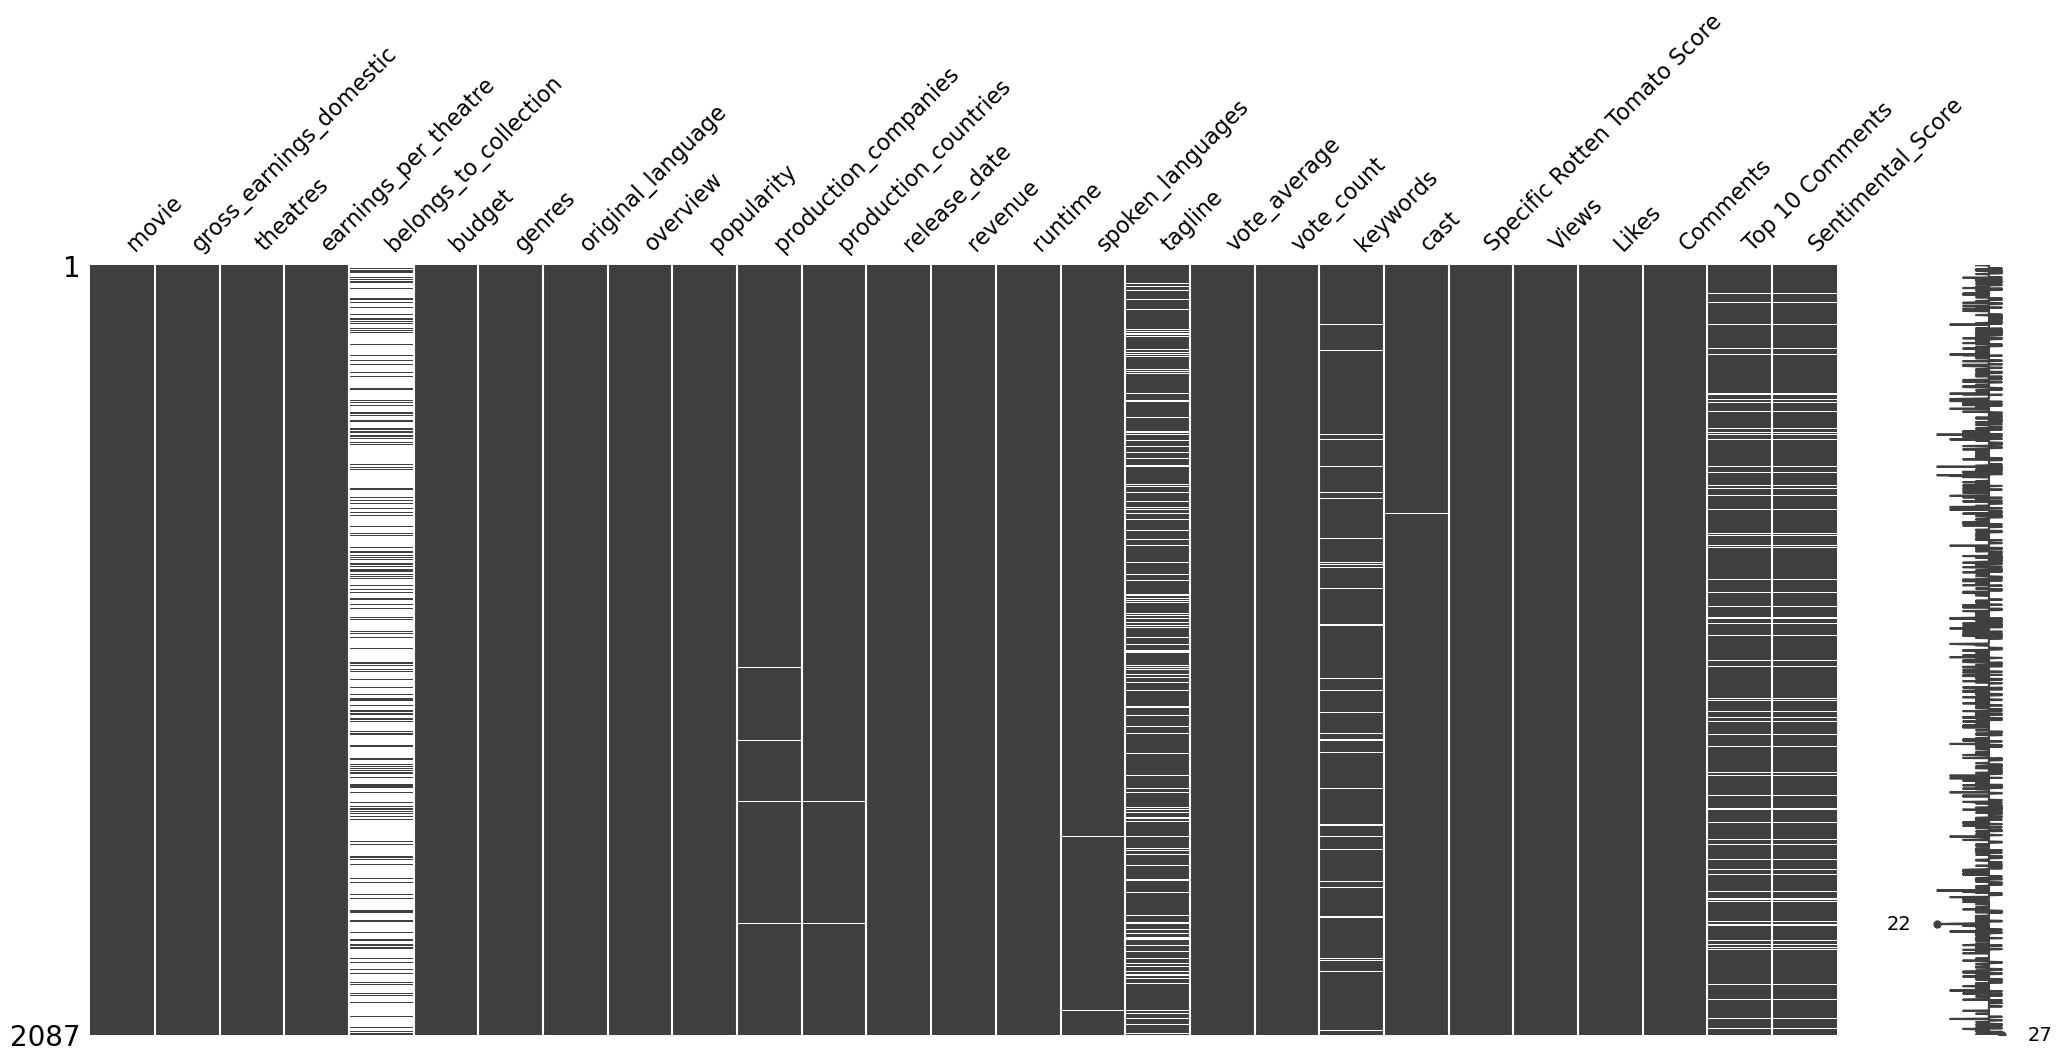

In [21]:
msno.matrix(processed_df)

In [22]:
processed_df.to_csv('final_data_2.csv',index=False)

## Processing + Feature engineering

In [24]:
model_path = "GoogleNews-vectors-negative300.bin"
word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [25]:
#Perform word embedding on a given column
def word_embed(x,model):
    """
    input:
    x- string of any length
    model- pre-trained NLP model
    
    output:
    array of shape (300,1) representing embedding of given string
    """
    overview_vec = nltk.word_tokenize(x.lower())
    vectors = [model.get_vector(word) for word in overview_vec if word in model.key_to_index]
    vector_final = np.sum(vectors,axis=0)/len(vectors)
    return vector_final.reshape(1,-1)[0]

# Function to assign each element in the array to new columns
def assign_embedding_columns(row):
    """
    input:
    row- row containing data in column 'overview_embedded' with array shape (300,1) as datapoints in the column
    output- embeddings
    """
    embeddings = row['overview_embedded'].flatten()  # Flatten the array to a 1D array
    columns = [f'overview_embedding_{i+1}' for i in range(embeddings.shape[0])]
    return pd.Series(embeddings, index=columns)

In [26]:
#Function to get mean frequency count
def mean_frequency(df,col):
    """
    Input: 
    df-dataframe
    col- column to get mean_frequency of each datapoint appearing in the list within each row
    
    output:
    series of mean frequency for each row in specified column in the dataframe
    """
    flattened_col = [data for data_list in df[col] for data in data_list]
    data_frequency = Counter(flattened_col)
    mean_data_frequency = {data: freq / len(df[col]) for data, freq in data_frequency.items()}
    return df[col].apply(lambda data_list: sum(mean_data_frequency[data] for data in data_list))

In [27]:
#function to featurize training and testing sets
def featurize(df):
    """
    input: dataset containing target variable and features
    output: dataset with features and target ready to be used in model
    """
    df = df.copy()
    df = df.set_index('movie')
    featurized_df = pd.DataFrame()
    
    #Separate numerical features
    num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
    
    df = df.dropna(subset=['production_companies','production_countries','cast','spoken_languages'])
    
    #Create more features from release date
    df['year'] = df['release_date'].dt.year
    df['month'] = df['release_date'].dt.month
    df['week'] = df['release_date'].dt.isocalendar().week
    df['weekday'] = df['release_date'].dt.weekday
    season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    df['season'] = (df['release_date'].dt.month % 12 + 3) // 3
    df['season'] = df['season'].map(season_mapping)    

    #Encode cat features
    #Using Binarizer
    mlb = MultiLabelBinarizer()
    genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres']), columns=[f'genres_{x}' for x in mlb.classes_], index=df.index)
    production_countries_encoded = pd.DataFrame(mlb.fit_transform(df['production_countries']), columns=[f'production_{x}' for x in mlb.classes_], index=df.index)
    spoken_language_encoded = pd.DataFrame(mlb.fit_transform(df['spoken_languages']), columns=[f'spoken_language_{x}' for x in mlb.classes_], index=df.index)
    
    #Use get_dummies
    #original_language_encoded = df['original_language'].str.get_dummies(prefix='original_language', prefix_sep='_')
    original_language_encoded = pd.get_dummies(df['original_language'],prefix='original_language', prefix_sep='_')
    year_encoded = pd.get_dummies(df['year'],prefix='Year', prefix_sep='_')
    month_encoded = pd.get_dummies(df['month'],prefix='month', prefix_sep='_')
    week_encoded = pd.get_dummies(df['week'],prefix='week',prefix_sep='_')
    weekday_encoded = pd.get_dummies(df['weekday'],prefix='weekday',prefix_sep='_')
    season_encoded = pd.get_dummies(df['season'],prefix='season',prefix_sep='_')
    
    #Word embedding
    df['overview_embedded'] = df['overview'].apply(lambda x: word_embed(x,word2vec_model))
    overview_embeddings = df.apply(assign_embedding_columns, axis=1)

    featurized_df = pd.concat([genres_encoded,production_countries_encoded,spoken_language_encoded,
                               original_language_encoded,overview_embeddings,year_encoded,month_encoded,
                               season_encoded,week_encoded,weekday_encoded,df.loc[:,num_features]],axis=1)
    
    featurized_df['mean_cast_frequency'] = mean_frequency(df,'cast')
    featurized_df['mean_prod_countries_frequency'] = mean_frequency(df,'production_countries')
    featurized_df['mean_prod_companies_frequency'] = mean_frequency(df,'production_companies')
    featurized_df['is_in_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x is np.nan else 1)
    featurized_df['num_languages'] = df['spoken_languages'].apply(lambda x: len(x))
    
    featurized_df = featurized_df.reindex(df.index)
    return featurized_df

## Exploratory Data Analysis

In [28]:
#Get potential features from processed dataset
featurized_df = featurize(processed_df)

In [29]:
def filter_correlation(df,feature,threshold):
    columns = [col for col in df.columns if feature in col]
    columns.append('revenue')
    correlation_matrix = df.loc[:,columns].corr(method= 'pearson')
    
    filtered_column_list = []
    for key, value in correlation_matrix.loc['revenue',:].items():
        if abs(value)>threshold:
            filtered_column_list.append(key)
        else:
            continue
    filtered_column_list.remove('revenue')
    return filtered_column_list

### Genres

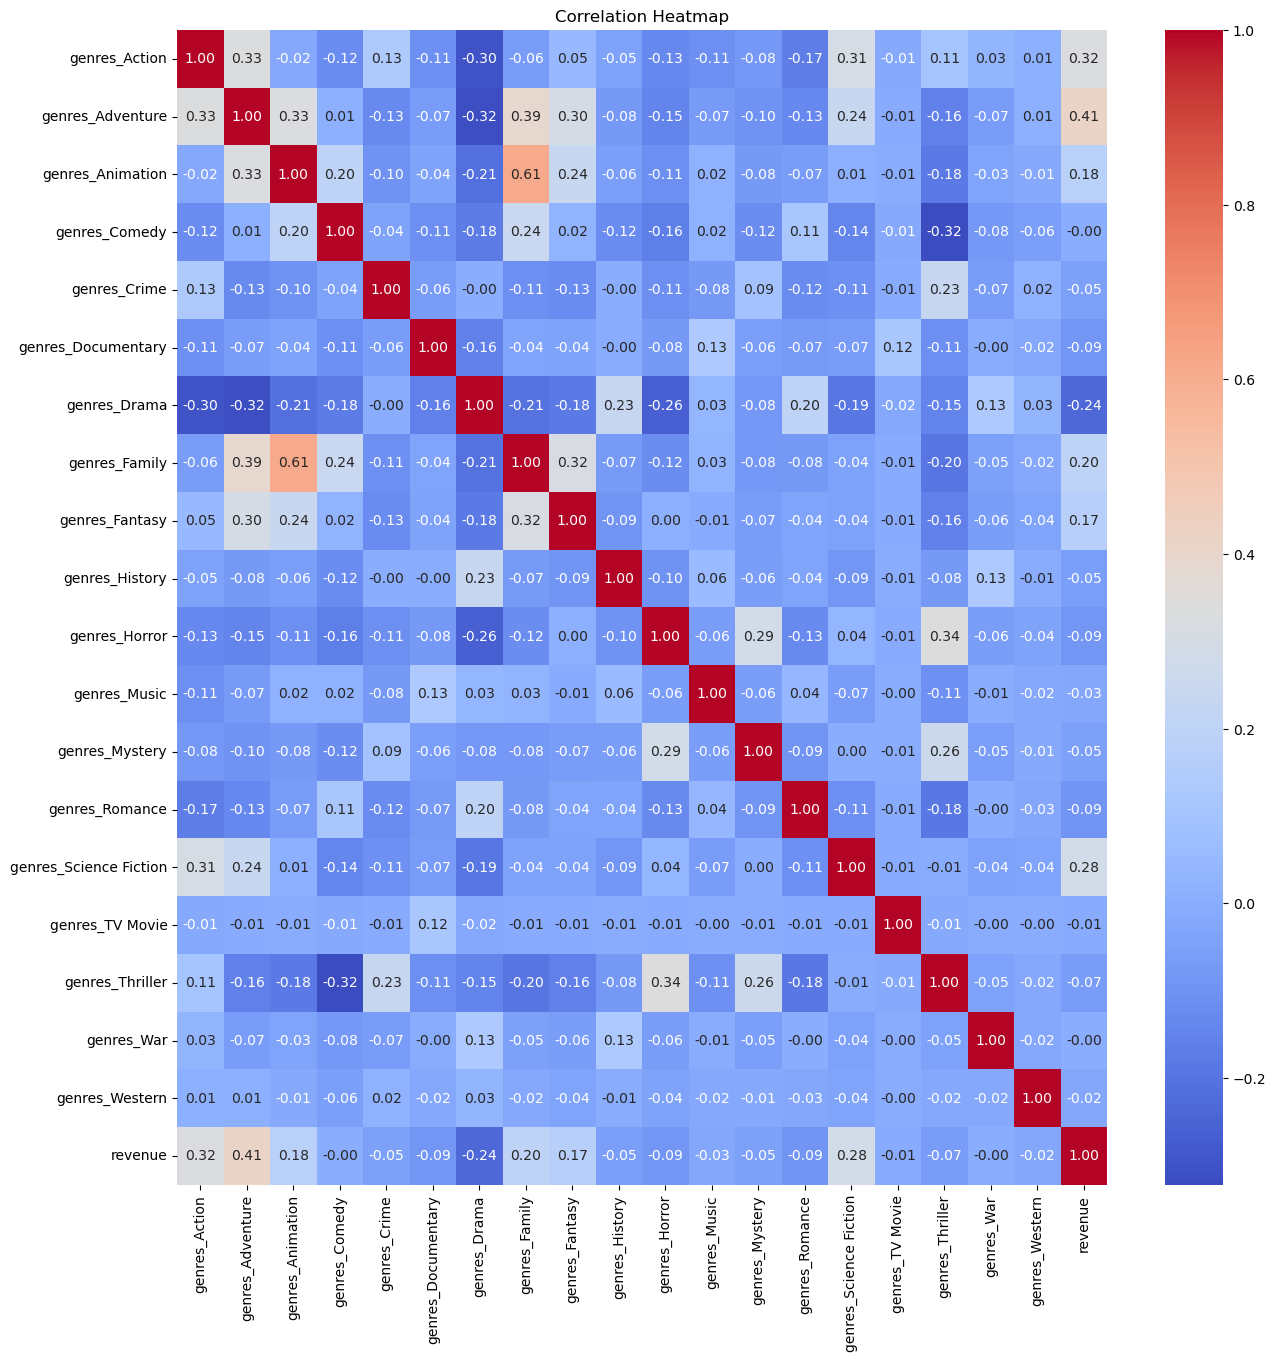

In [30]:
#Define genres columns
genres_columns = [col for col in featurized_df.columns if 'genre' in col]
genres_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,genres_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:
#Filter encoded features from 'genres' based on correlation threshold of 0.1
filter_correlation(featurized_df,'genre',0.1)

['genres_Action',
 'genres_Adventure',
 'genres_Animation',
 'genres_Drama',
 'genres_Family',
 'genres_Fantasy',
 'genres_Science Fiction']

### Production countries

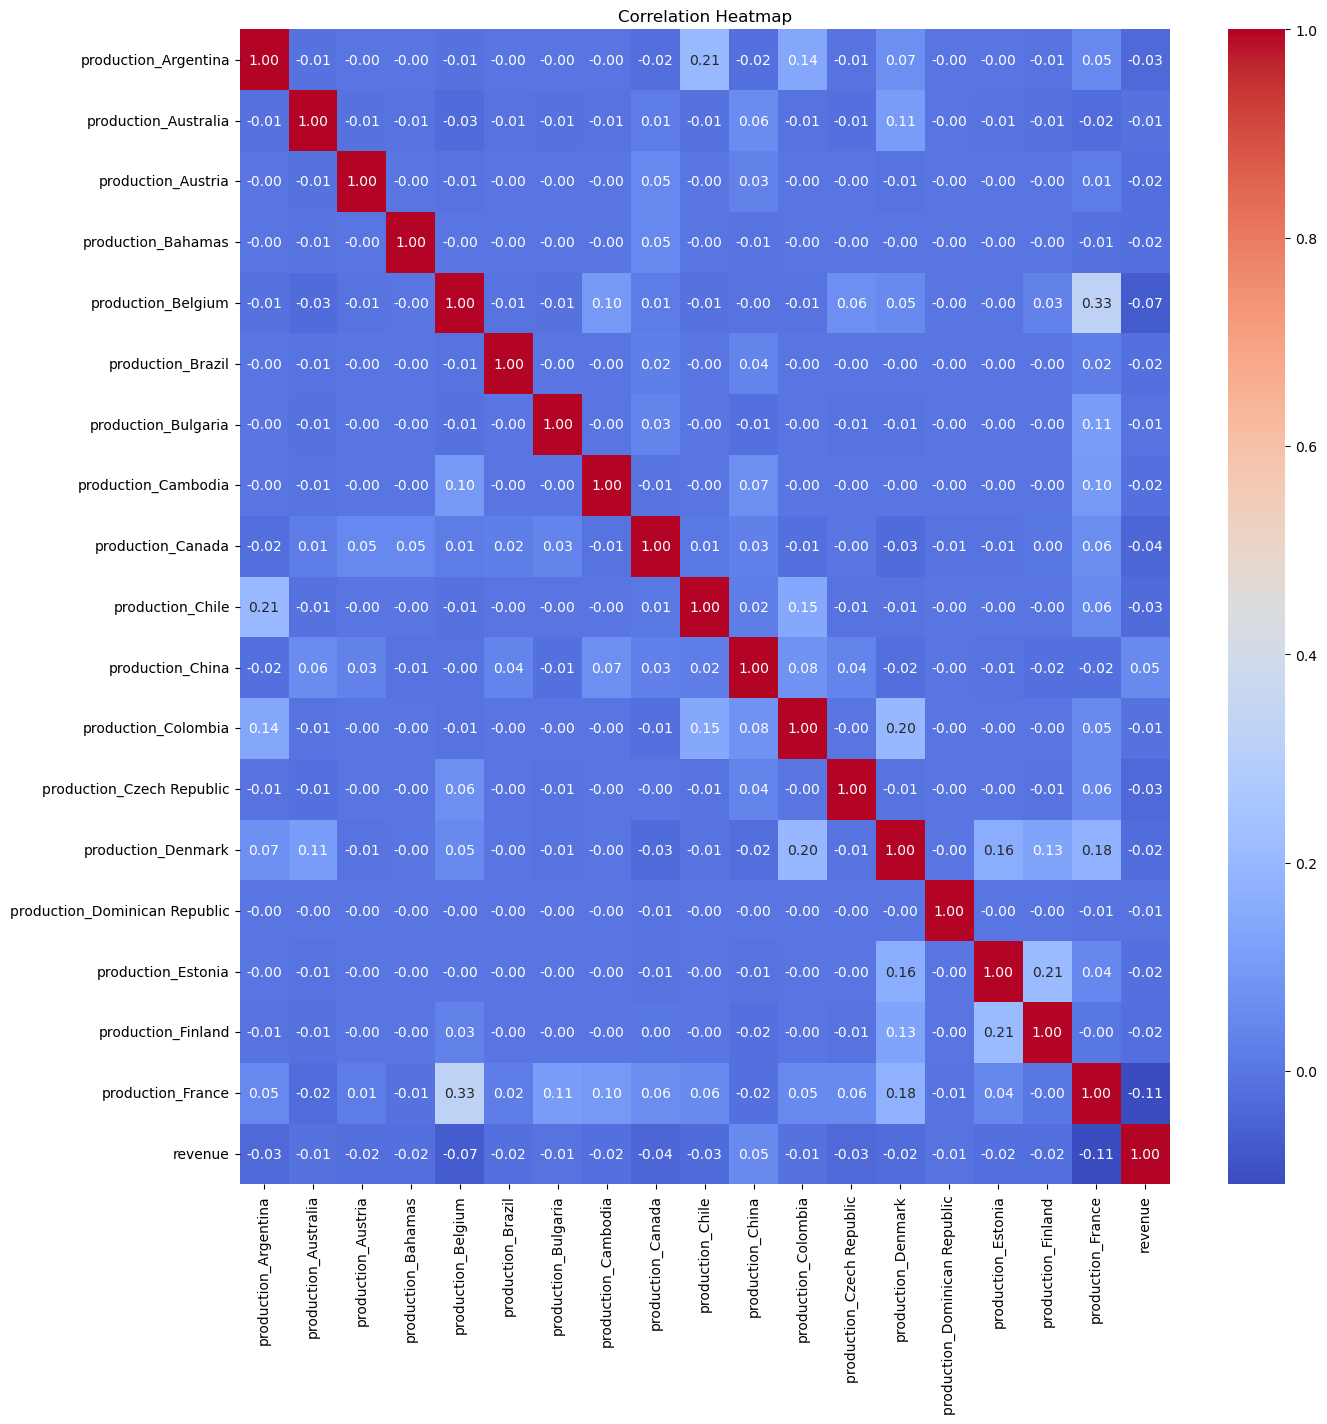

In [32]:
#Define poduction countries columns
prod_countries_columns = [col for col in featurized_df.columns if 'production_' in col]
prod_countries_columns = prod_countries_columns[:18]
prod_countries_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,prod_countries_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

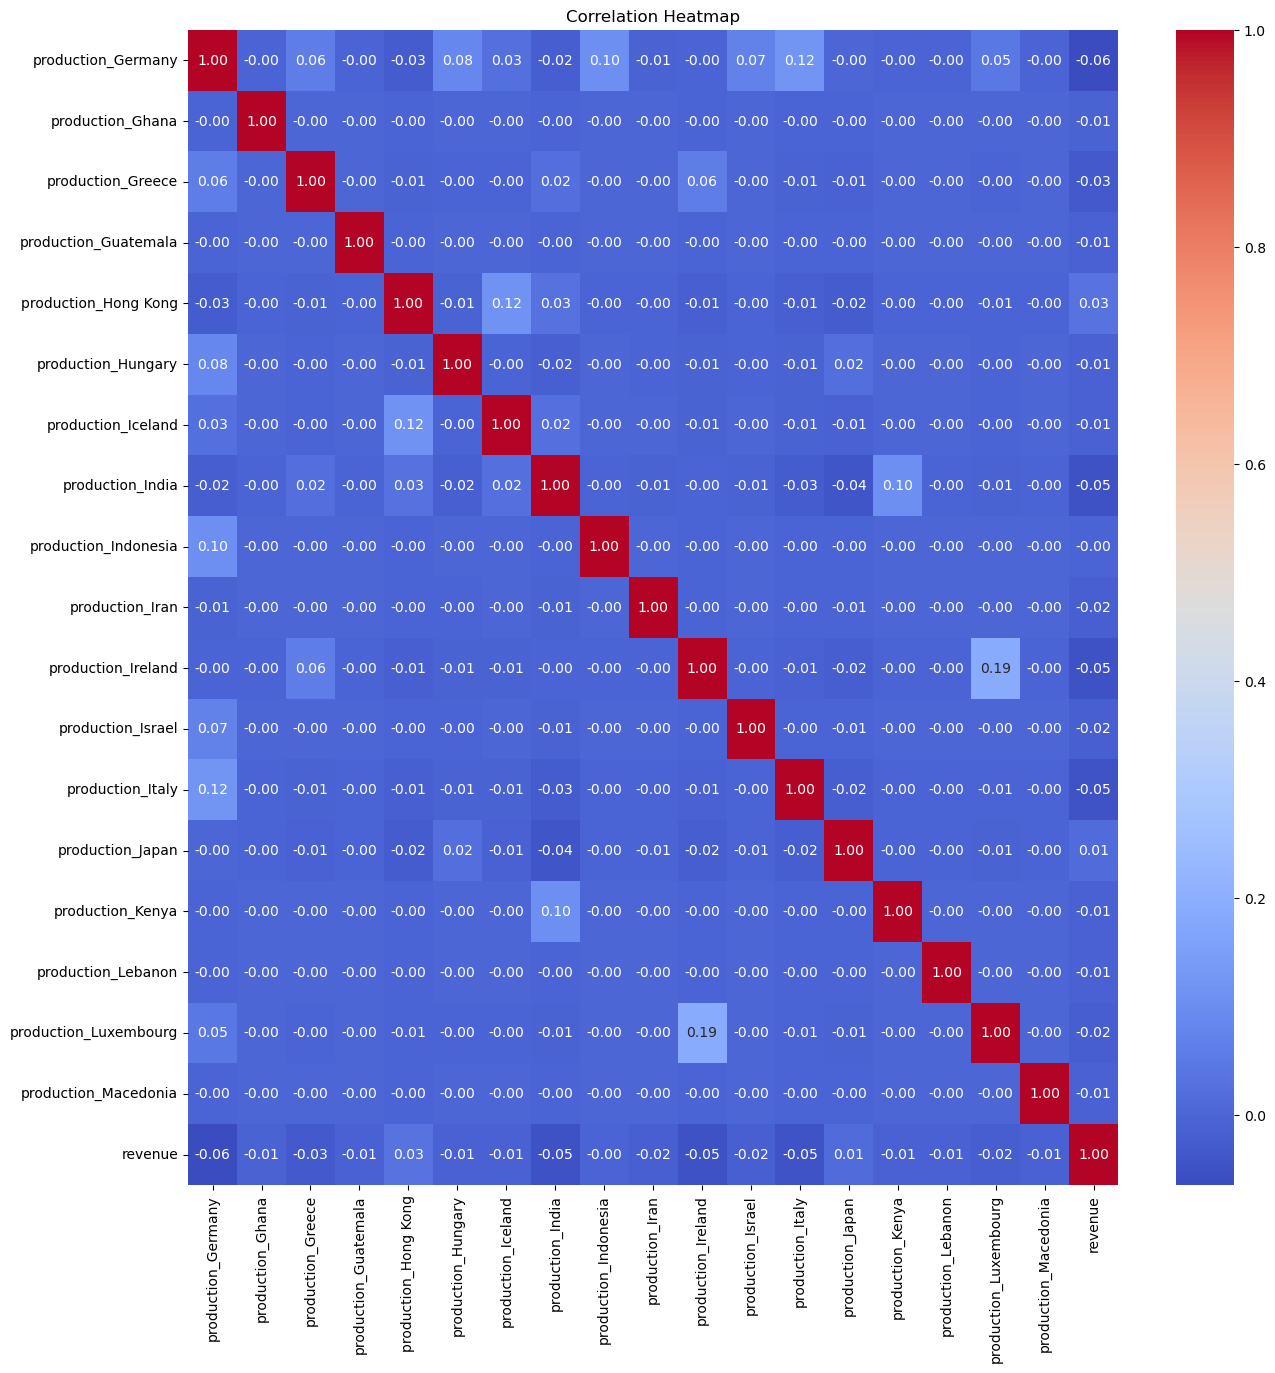

In [33]:
#Define poduction countries columns
prod_countries_columns = [col for col in featurized_df.columns if 'production_' in col]
prod_countries_columns = prod_countries_columns[18:36]
prod_countries_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,prod_countries_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

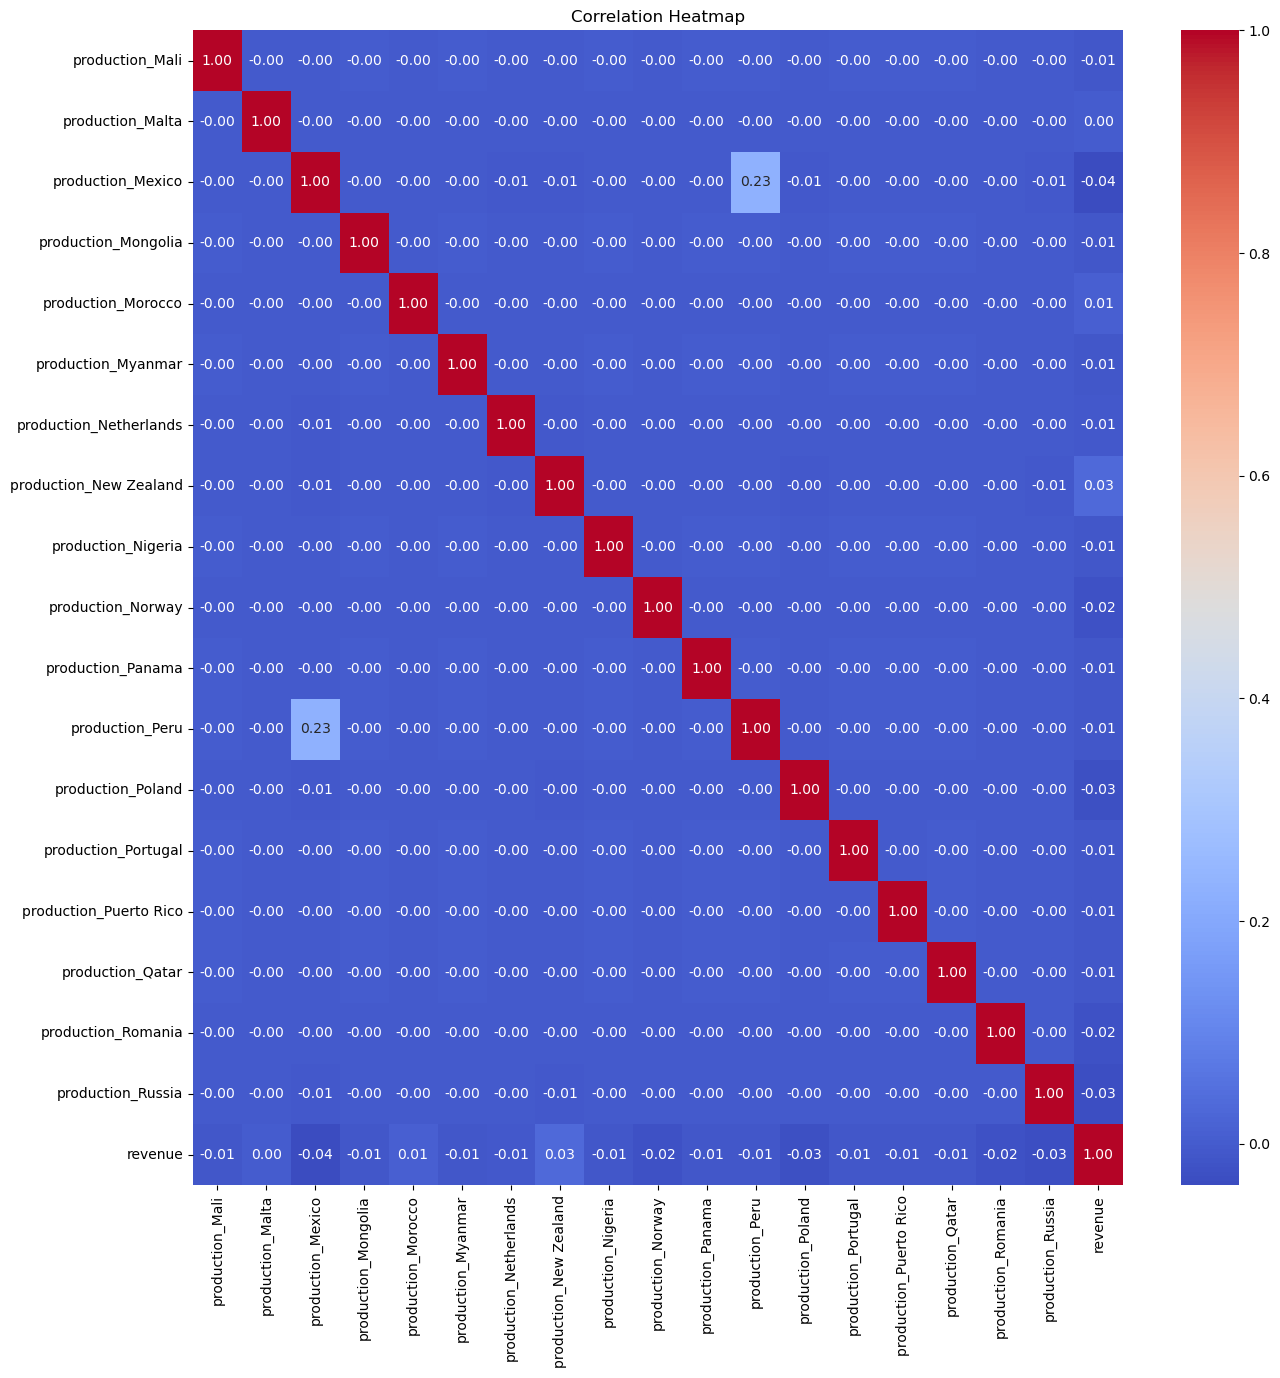

In [34]:
#Define poduction countries columns
prod_countries_columns = [col for col in featurized_df.columns if 'production_' in col]
prod_countries_columns = prod_countries_columns[36:54]
prod_countries_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,prod_countries_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

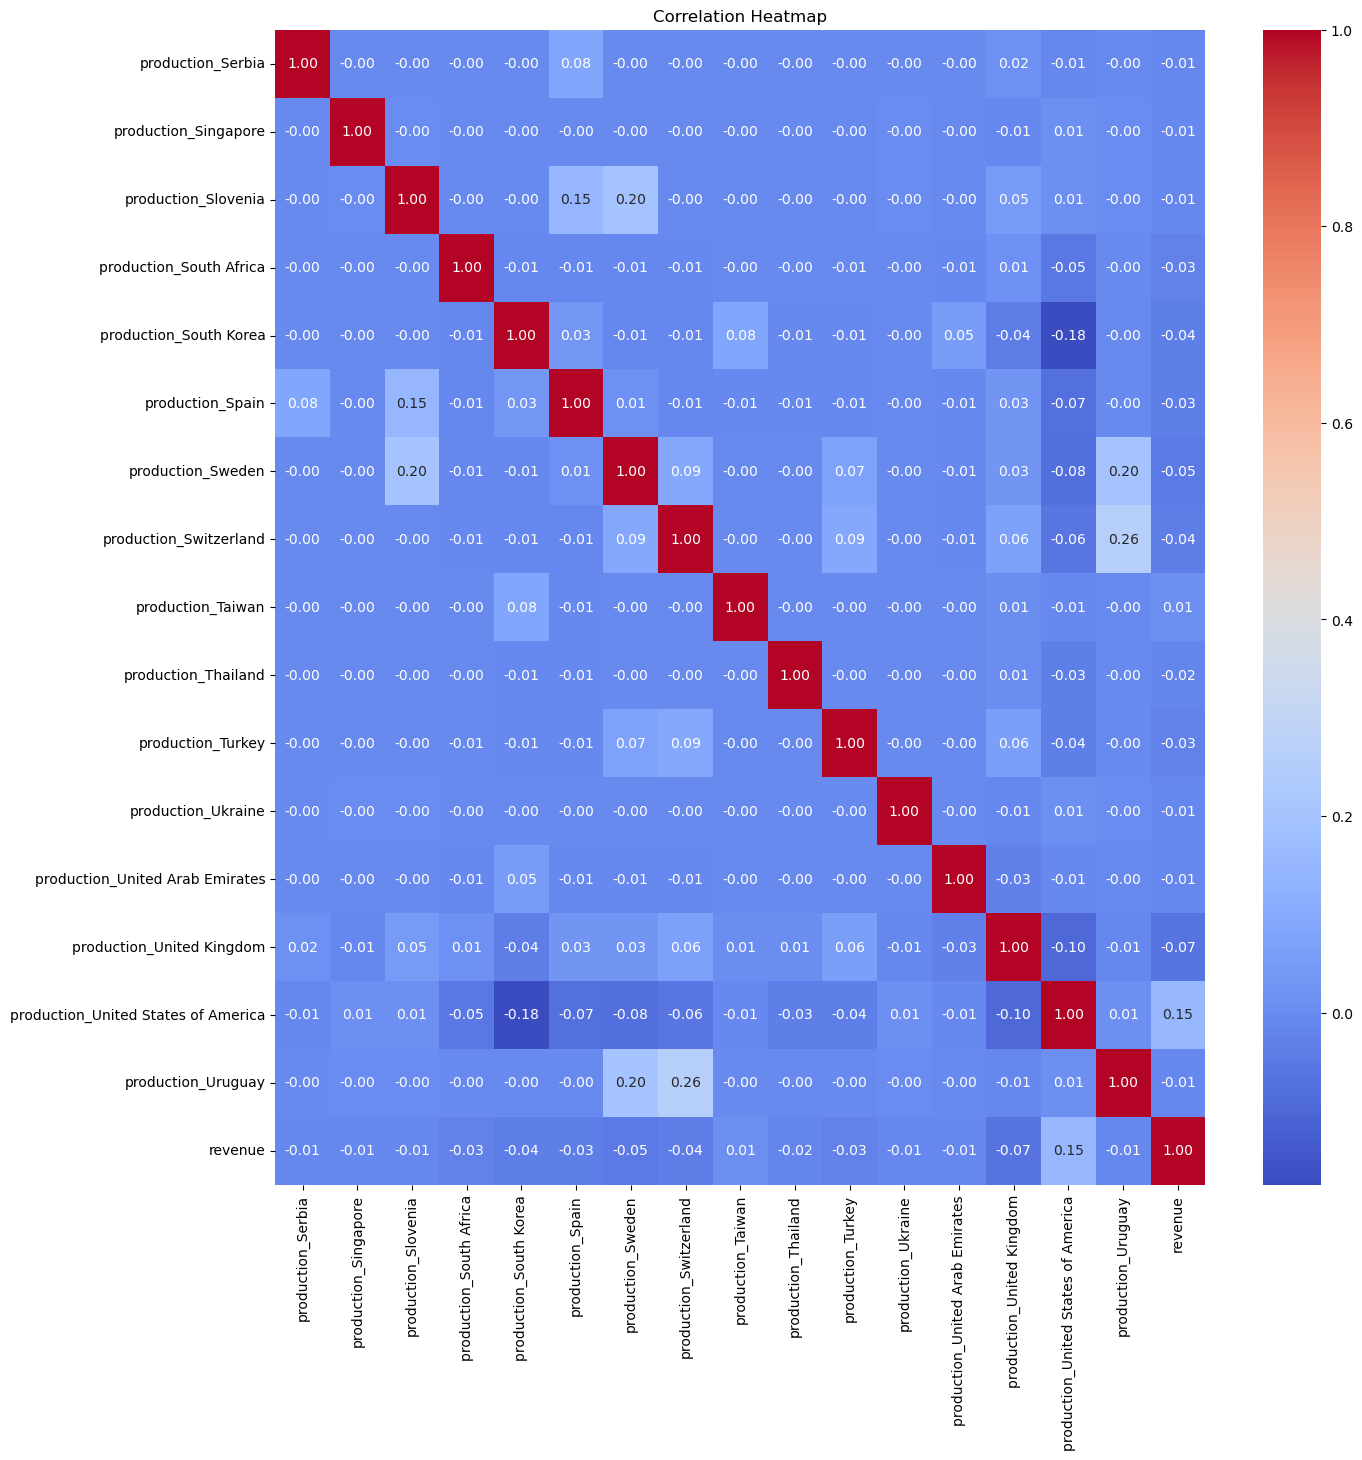

In [35]:
#Define poduction countries columns
prod_countries_columns = [col for col in featurized_df.columns if 'production_' in col]
prod_countries_columns = prod_countries_columns[54:]
prod_countries_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,prod_countries_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [36]:
#Filter encoded features from 'production_countries' based on correlation threshold of 0.05
filter_correlation(featurized_df,'production_',0.05)

['production_Belgium',
 'production_China',
 'production_France',
 'production_Germany',
 'production_United Kingdom',
 'production_United States of America']

### Spoken language

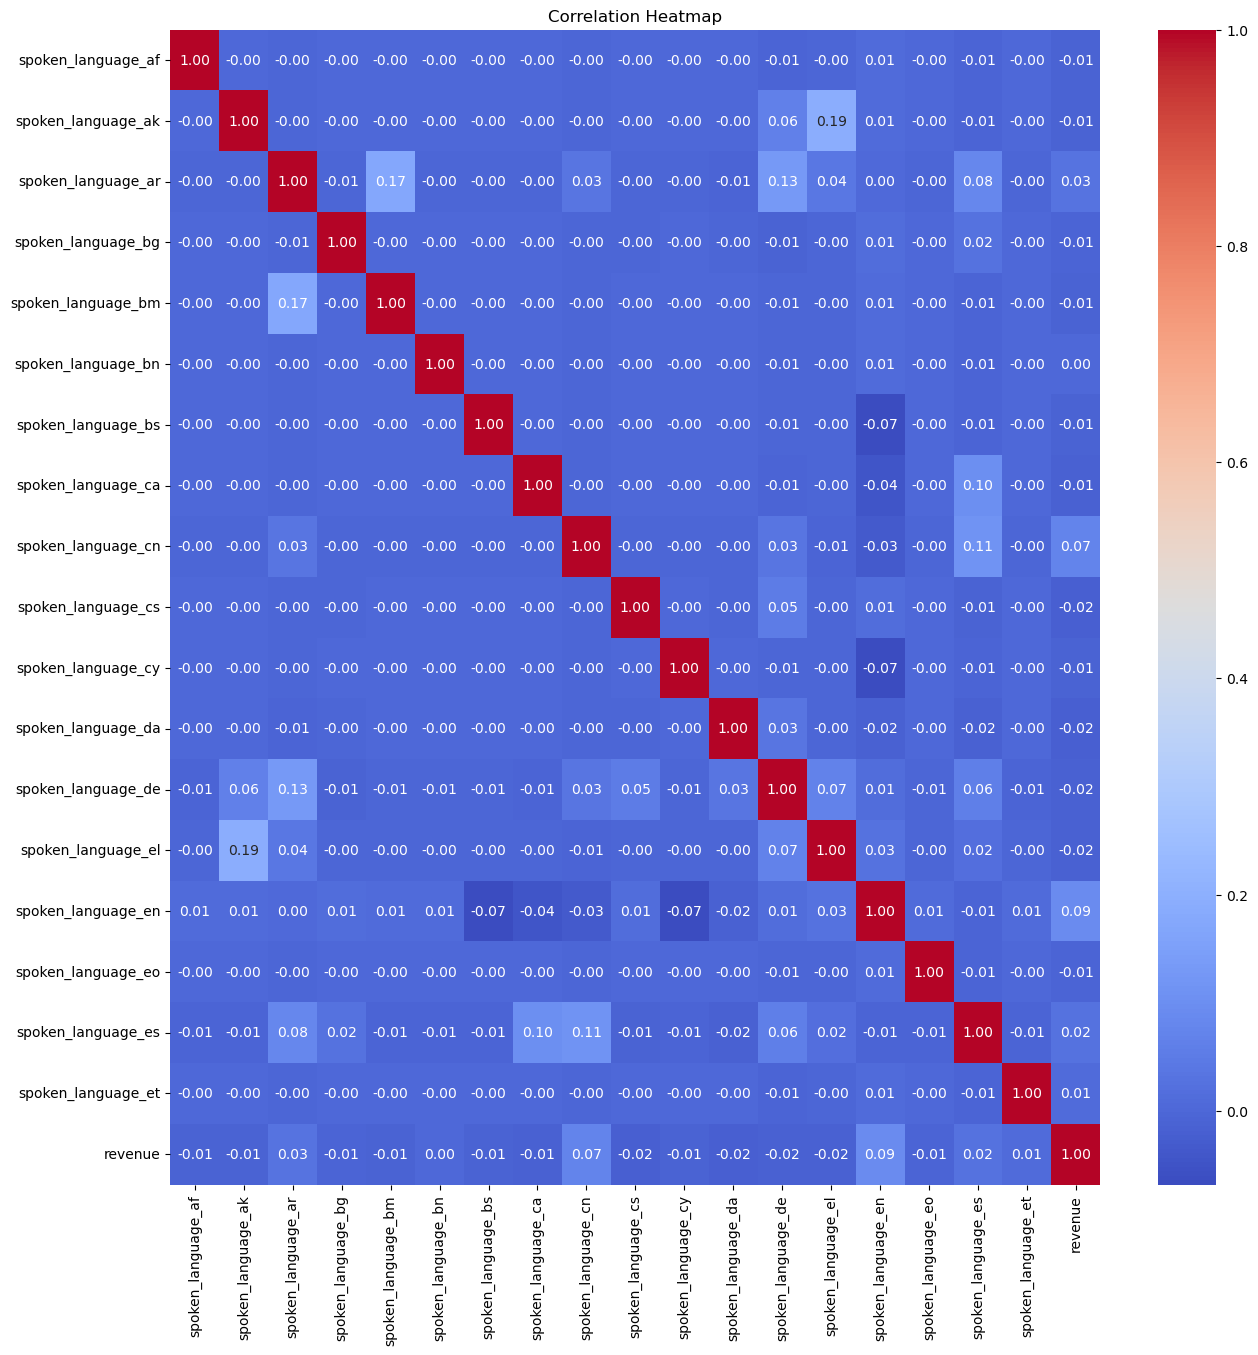

In [37]:
#Define spoken language columns
spoken_lang_columns = [col for col in featurized_df.columns if 'spoken_' in col]
spoken_lang_columns = spoken_lang_columns[:18]
spoken_lang_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,spoken_lang_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

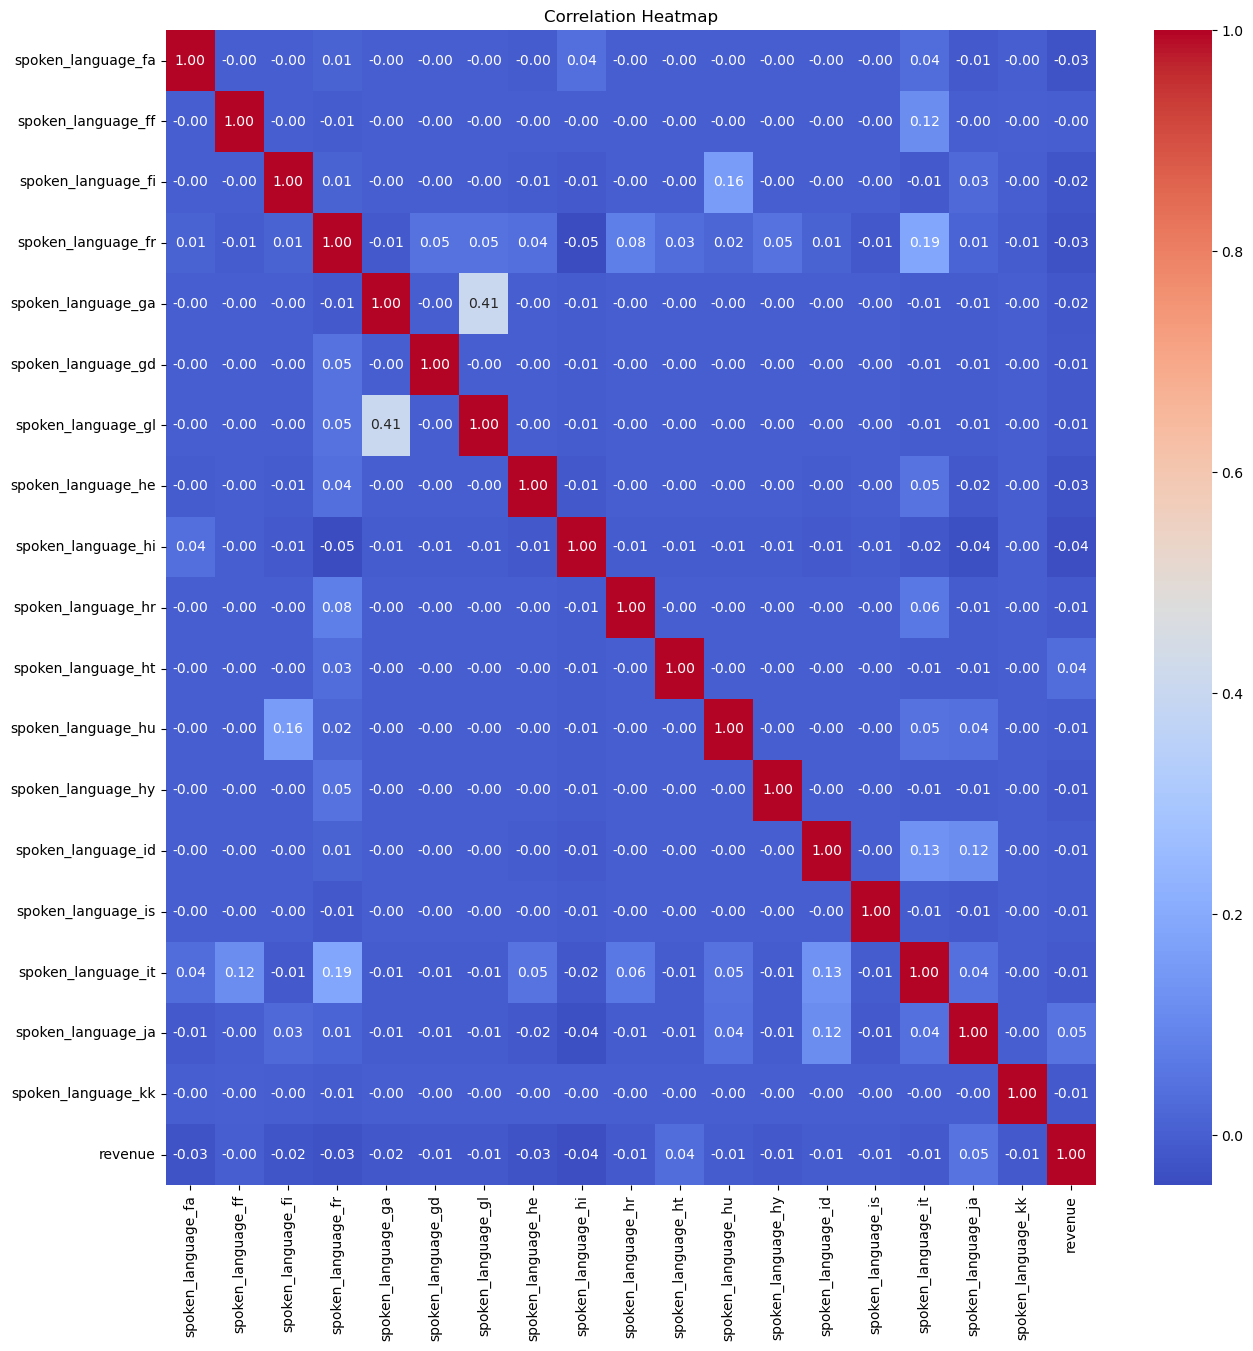

In [38]:
#Define spoken language columns
spoken_lang_columns = [col for col in featurized_df.columns if 'spoken_' in col]
spoken_lang_columns = spoken_lang_columns[18:36]
spoken_lang_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,spoken_lang_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

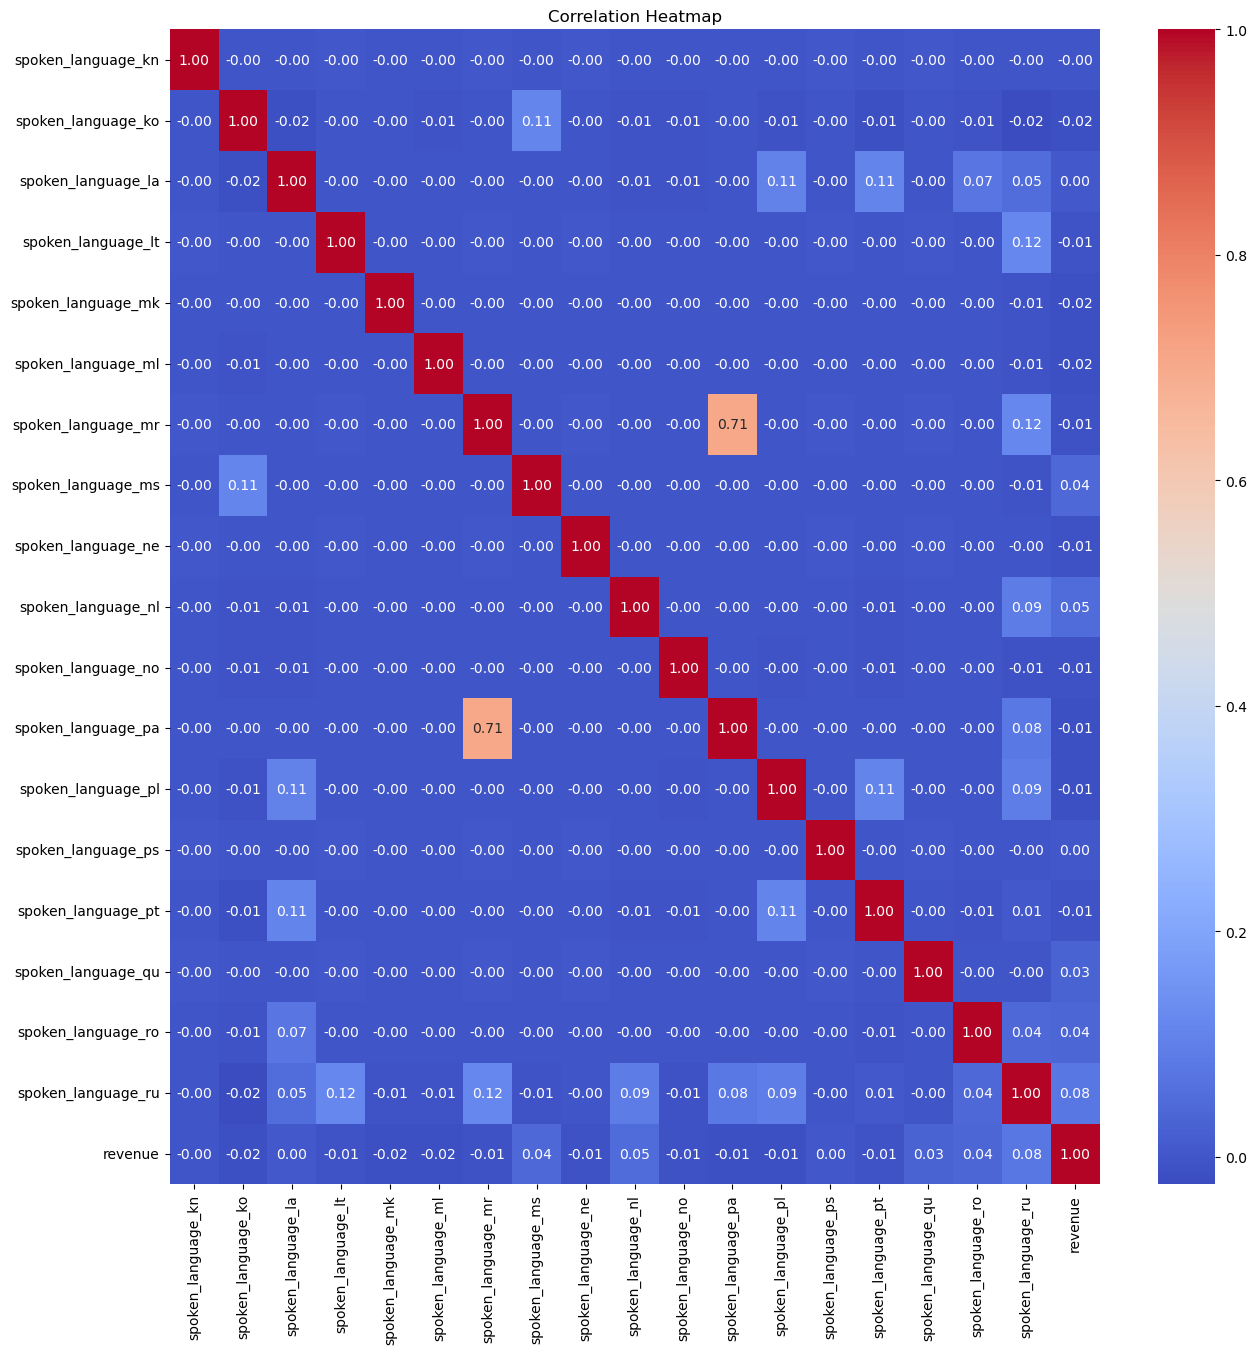

In [39]:
#Define spoken language columns
spoken_lang_columns = [col for col in featurized_df.columns if 'spoken_' in col]
spoken_lang_columns = spoken_lang_columns[36:54]
spoken_lang_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,spoken_lang_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

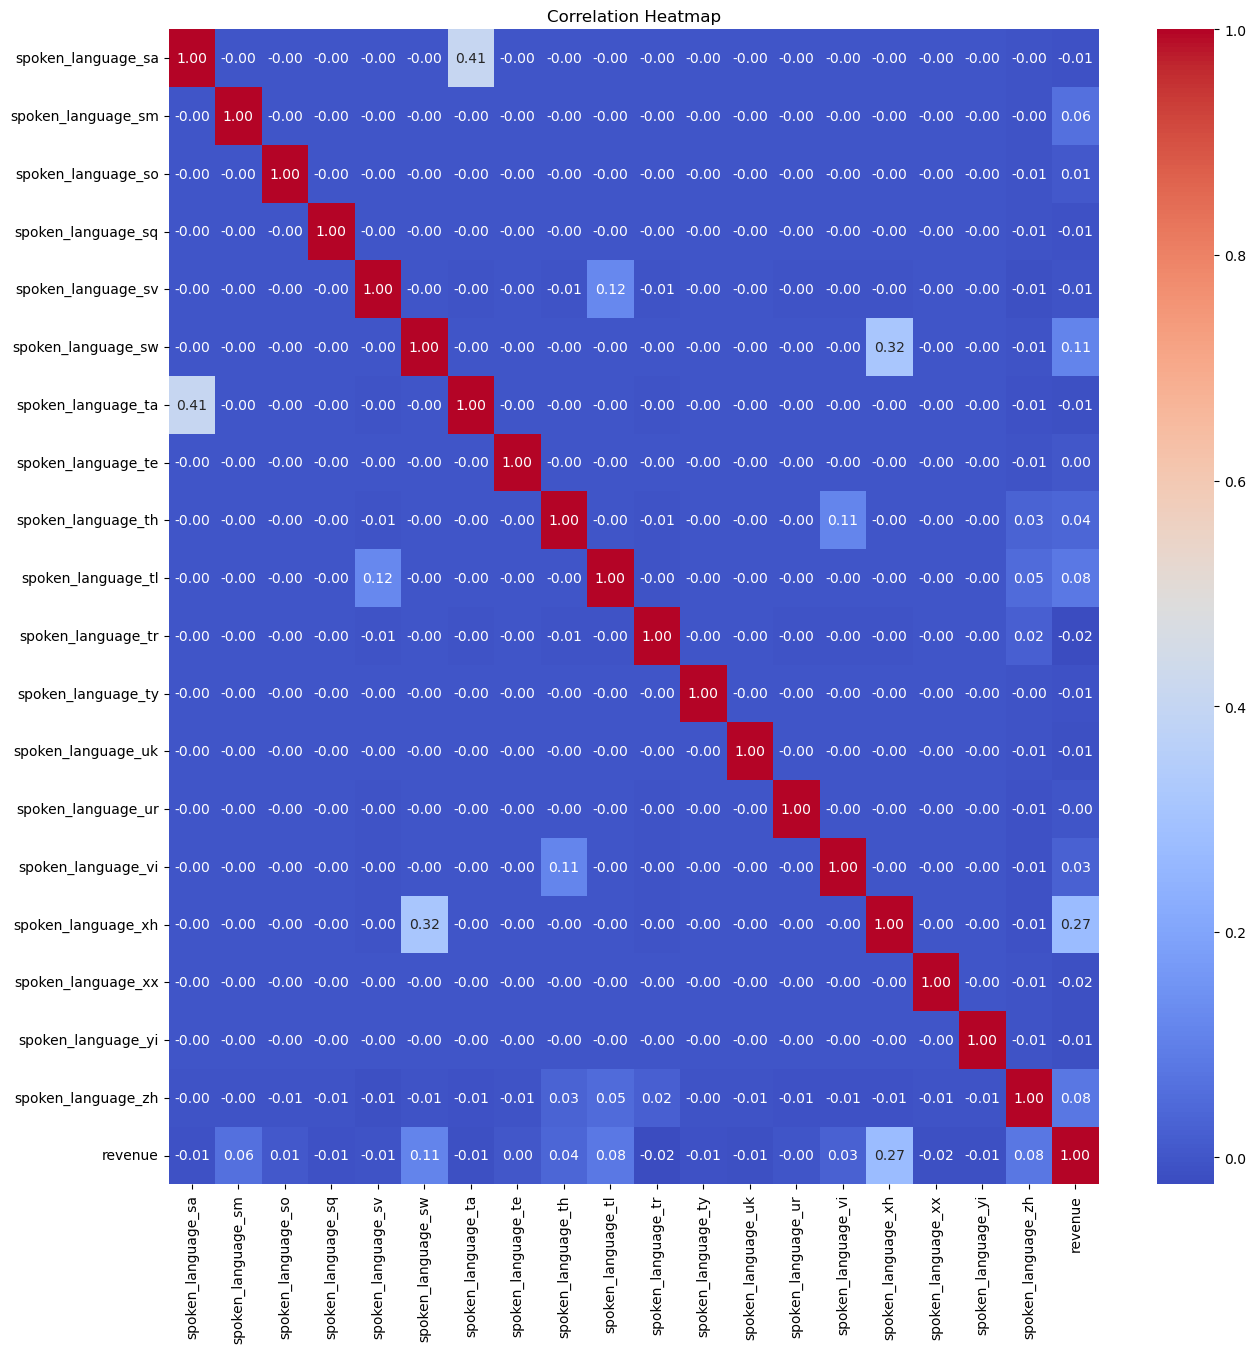

In [40]:
#Define spoken language columns
spoken_lang_columns = [col for col in featurized_df.columns if 'spoken_' in col]
spoken_lang_columns = spoken_lang_columns[54:]
spoken_lang_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,spoken_lang_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [41]:
#Filter encoded features from 'spoken_languages' based on correlation threshold of 0.05
filter_correlation(featurized_df,'spoken_',0.05)

['spoken_language_cn',
 'spoken_language_en',
 'spoken_language_nl',
 'spoken_language_ru',
 'spoken_language_sm',
 'spoken_language_sw',
 'spoken_language_tl',
 'spoken_language_xh',
 'spoken_language_zh']

### Original language

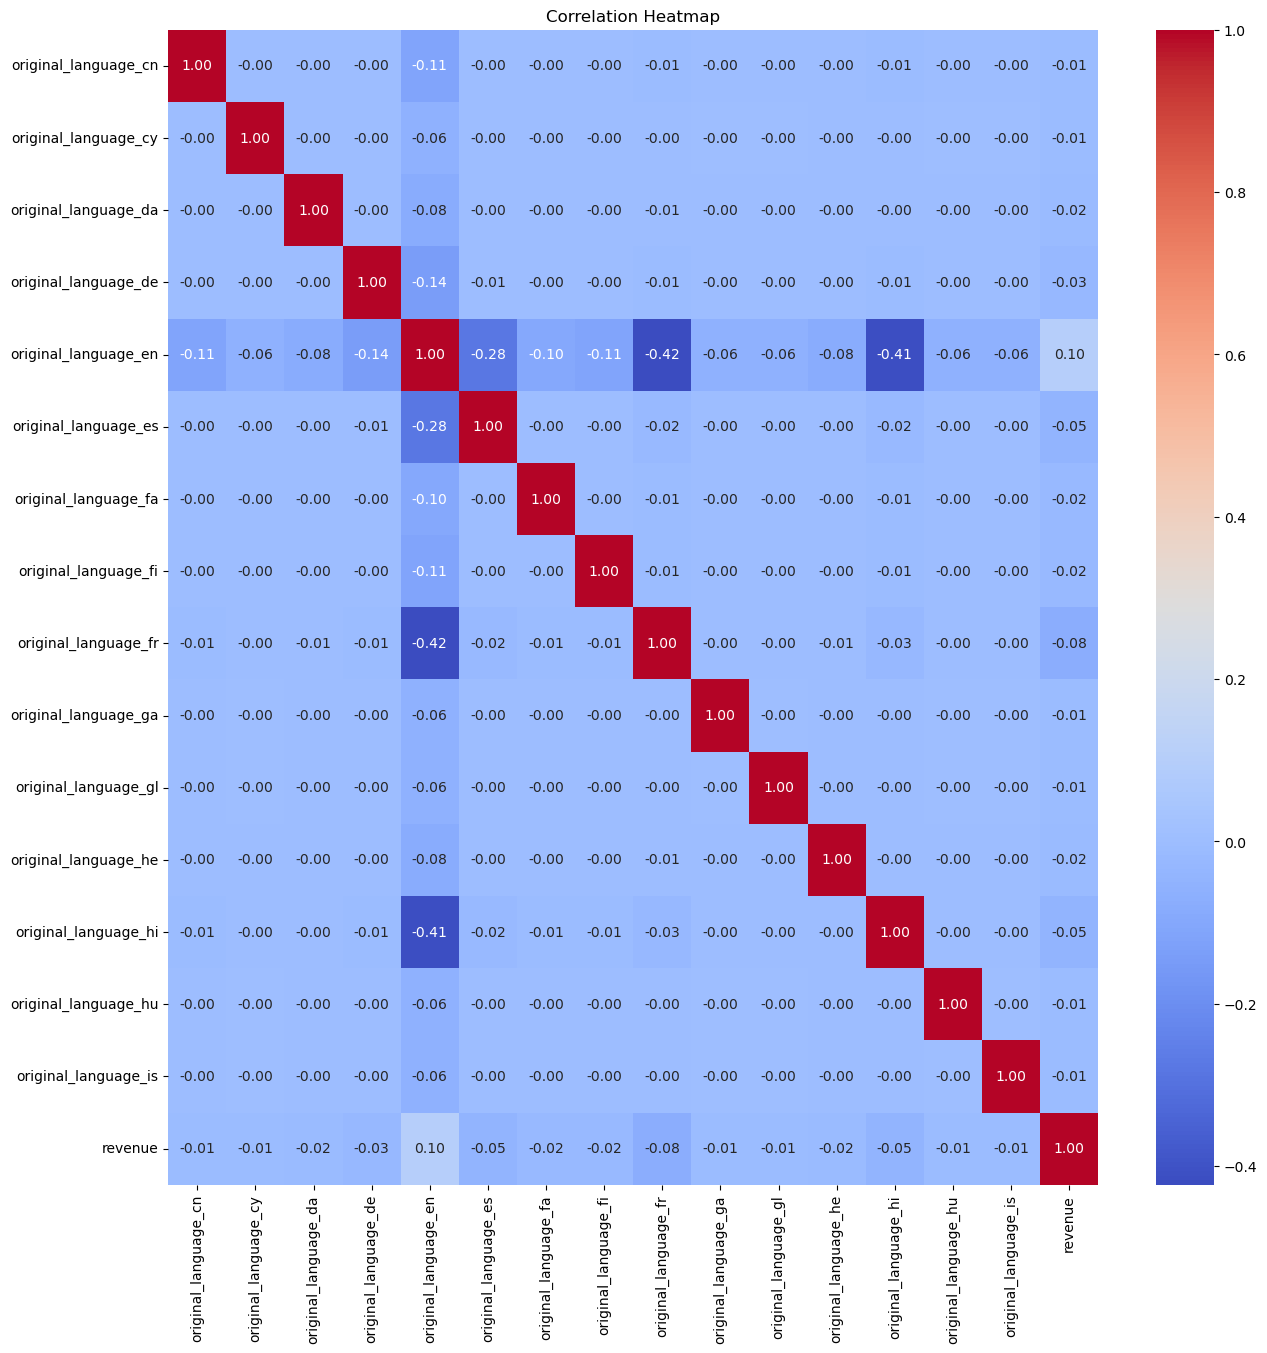

In [42]:
#Define original language columns
original_lang_columns = [col for col in featurized_df.columns if 'original' in col]
original_lang_columns = original_lang_columns[:15]
original_lang_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,original_lang_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

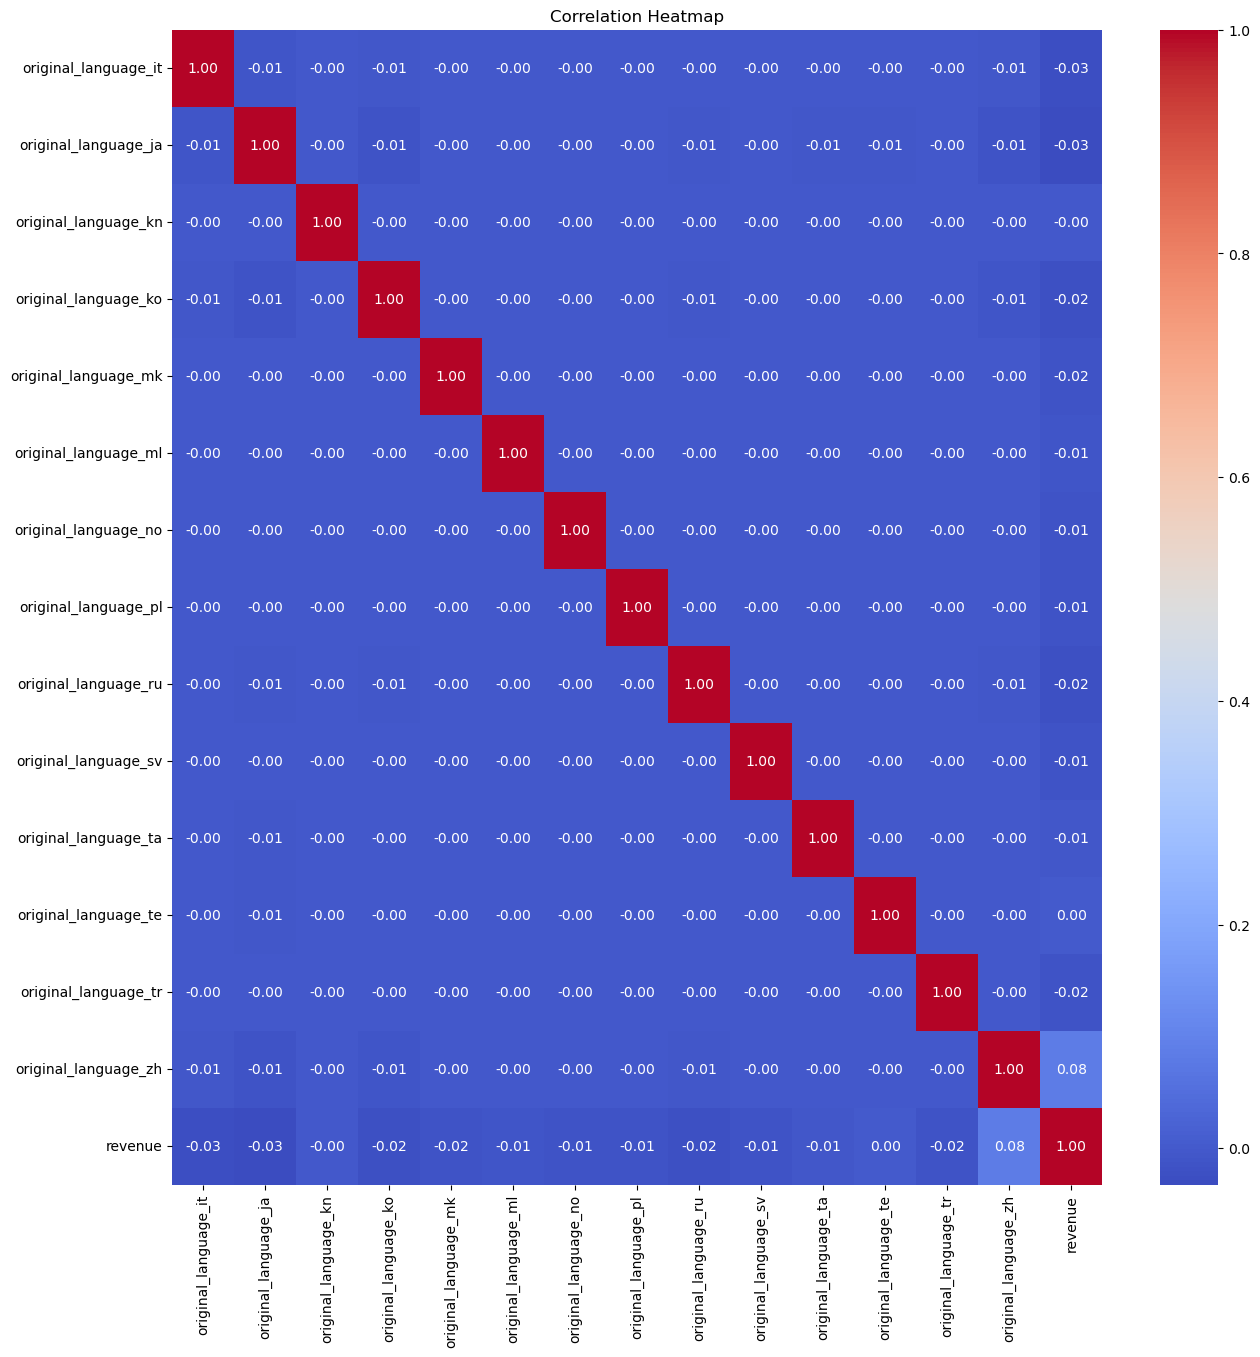

In [43]:
#Define original language columns
original_lang_columns = [col for col in featurized_df.columns if 'original' in col]
original_lang_columns = original_lang_columns[15:]
original_lang_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,original_lang_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [44]:
#Filter encoded features from 'original_languages' based on correlation threshold of 0.05
filter_correlation(featurized_df,'original',0.05)

['original_language_en',
 'original_language_fr',
 'original_language_hi',
 'original_language_zh']

### Year

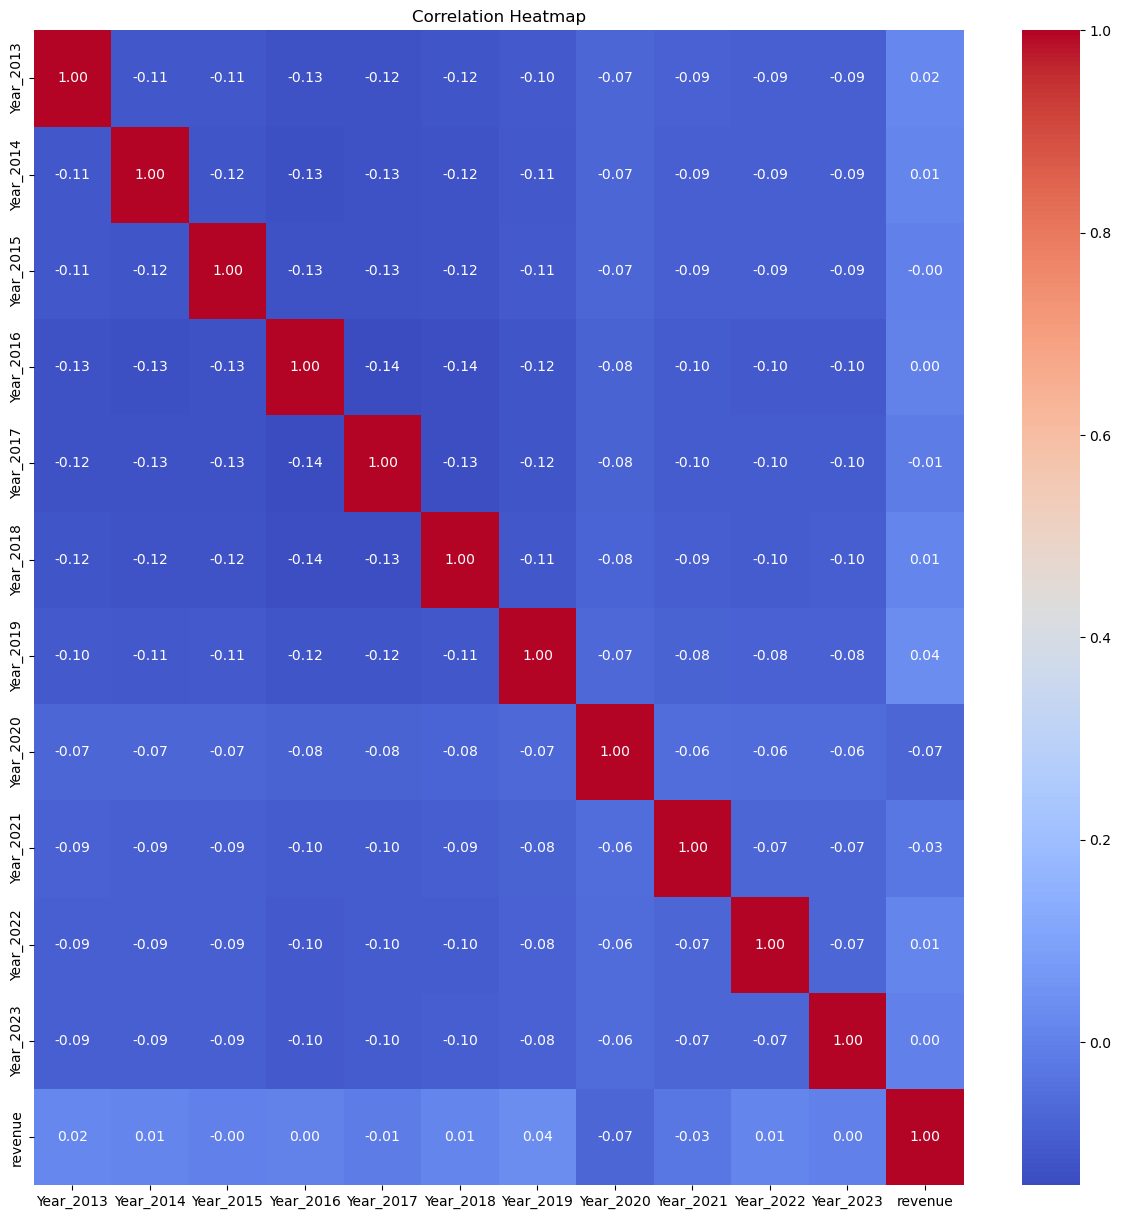

In [45]:
#Define Year columns
year_columns = [col for col in featurized_df.columns if 'Year' in col]
year_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,year_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [46]:
#Filter encoded features from 'Year' based on correlation threshold of 0.05
filter_correlation(featurized_df,'Year',0.05)

['Year_2020']

### Month

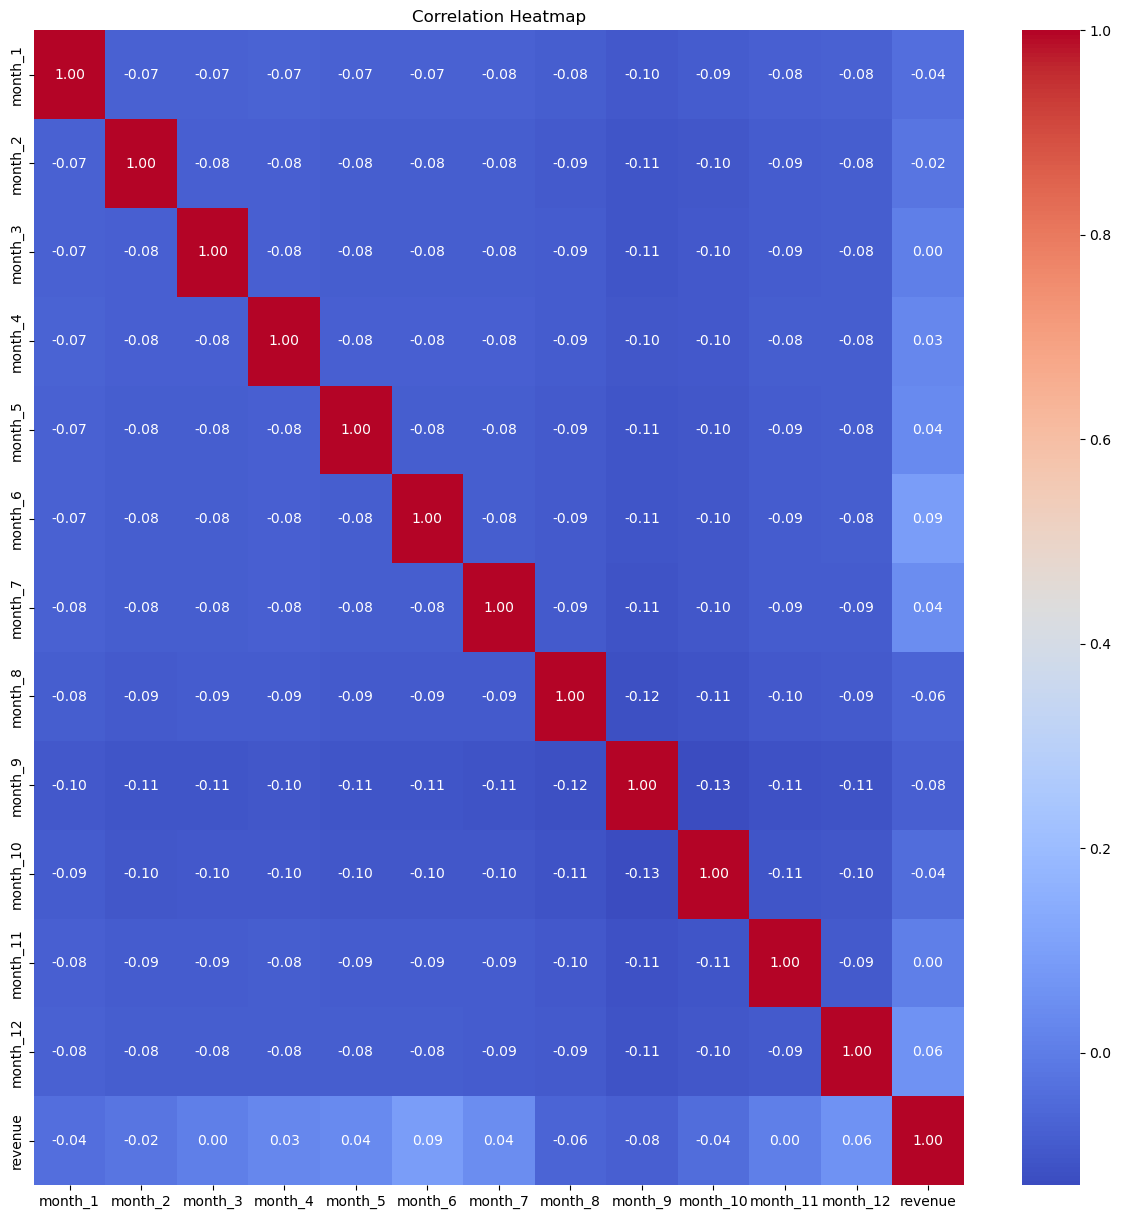

In [47]:
#Define month columns
month_columns = [col for col in featurized_df.columns if 'month' in col]
month_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,month_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [48]:
#Filter encoded features from 'month' based on correlation threshold of 0.05
filter_correlation(featurized_df,'month_',0.05)

['month_6', 'month_8', 'month_9', 'month_12']

### Week

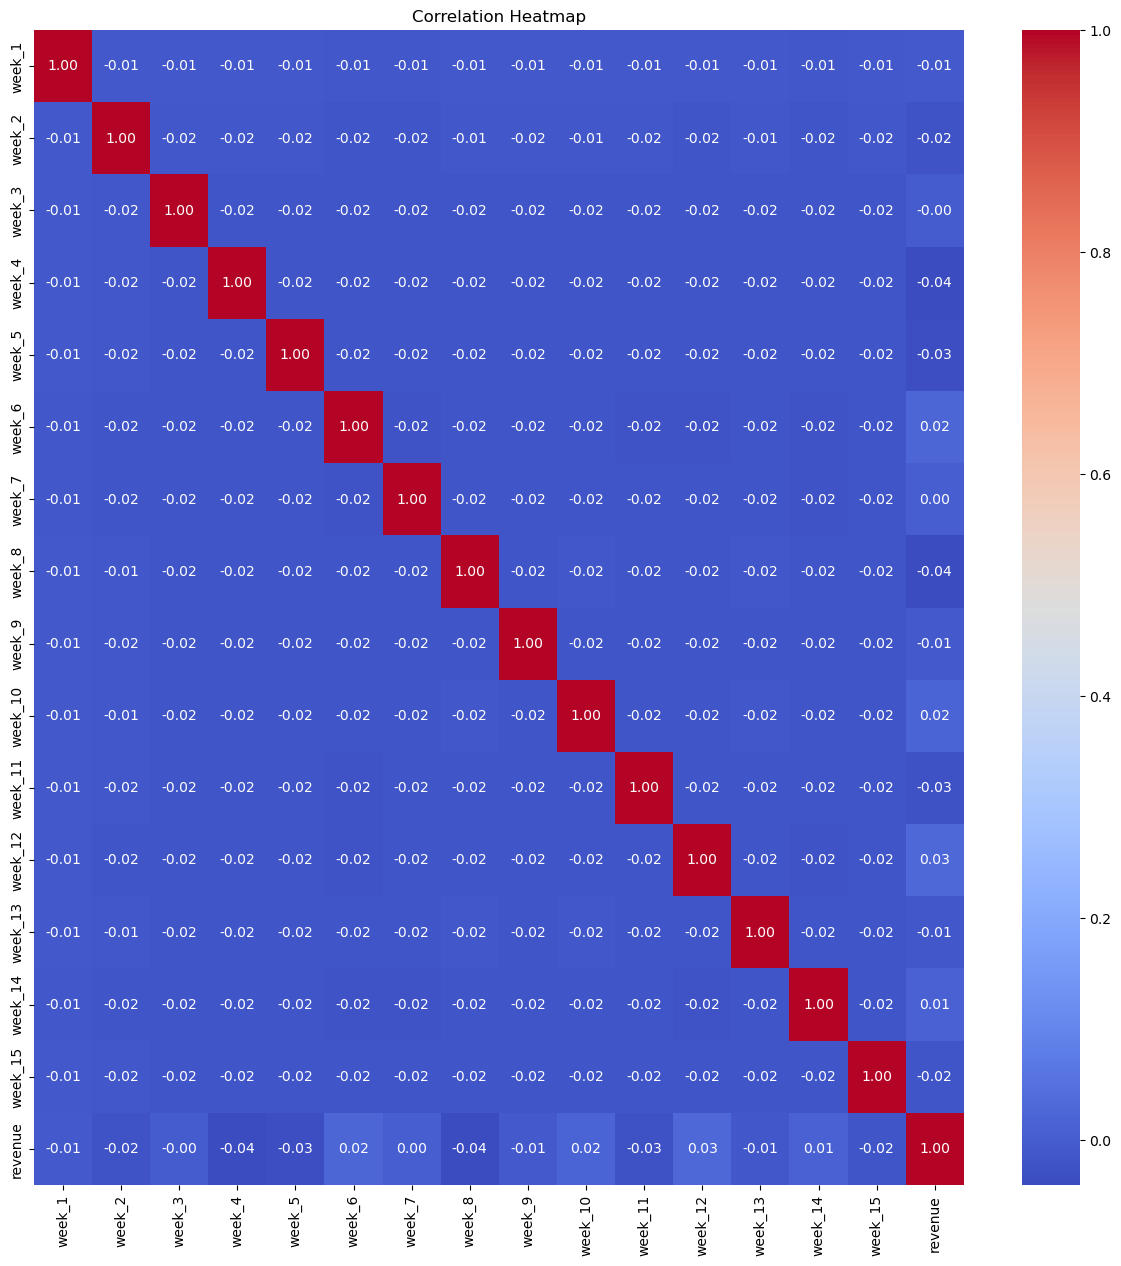

In [49]:
#Define week columns
week_columns = [col for col in featurized_df.columns if 'week_' in col]
week_columns = week_columns[:15]
week_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,week_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

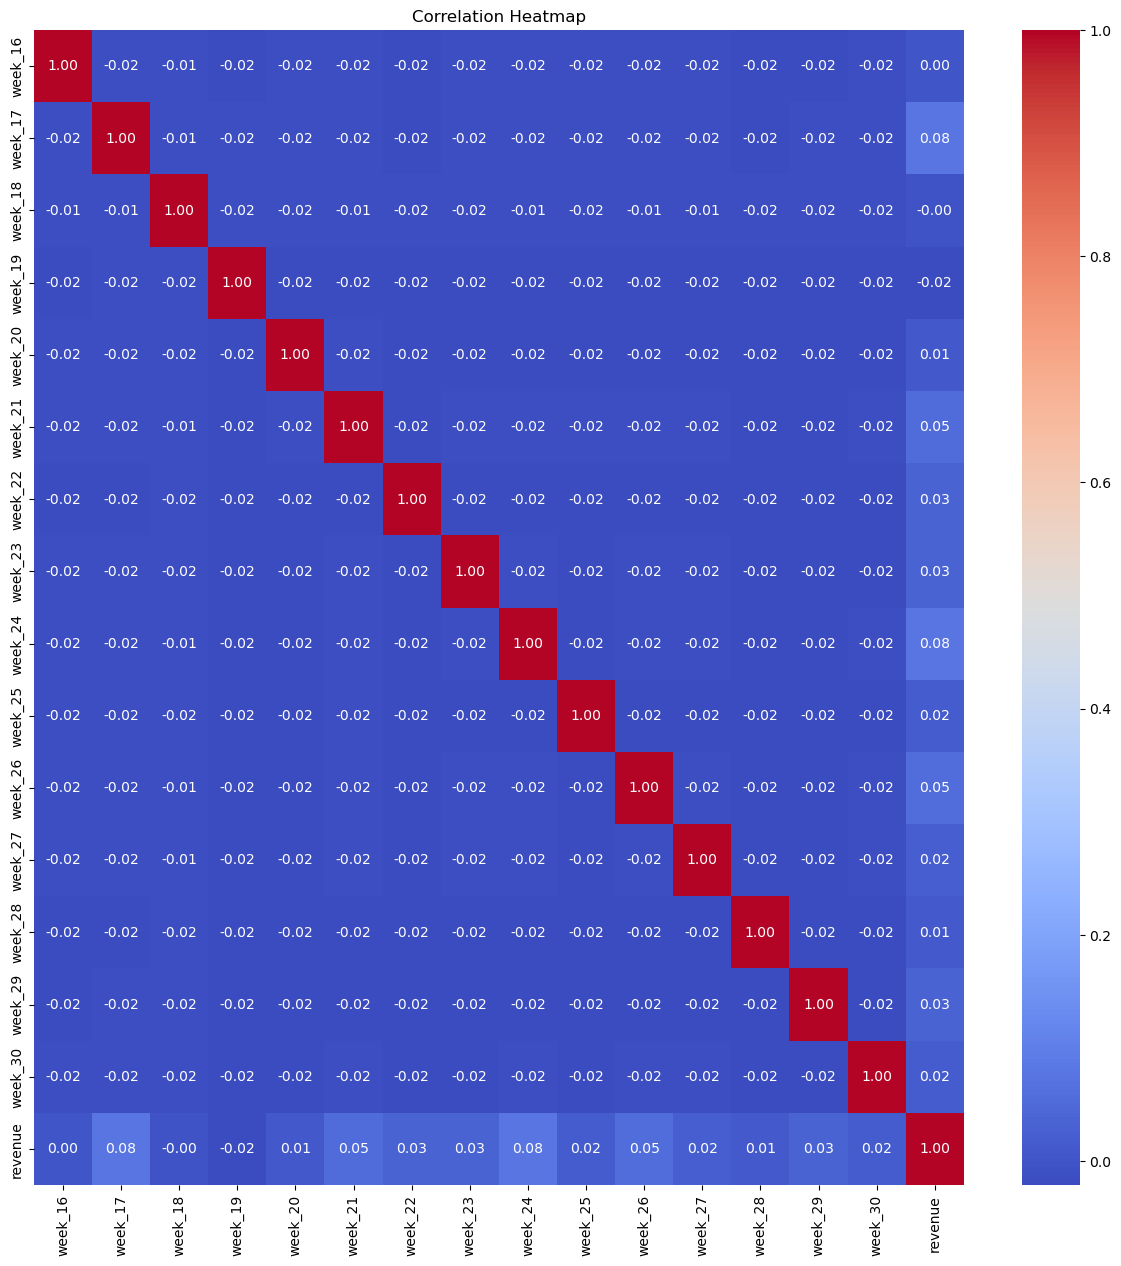

In [50]:
#Define week columns
week_columns = [col for col in featurized_df.columns if 'week_' in col]
week_columns = week_columns[15:30]
week_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,week_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

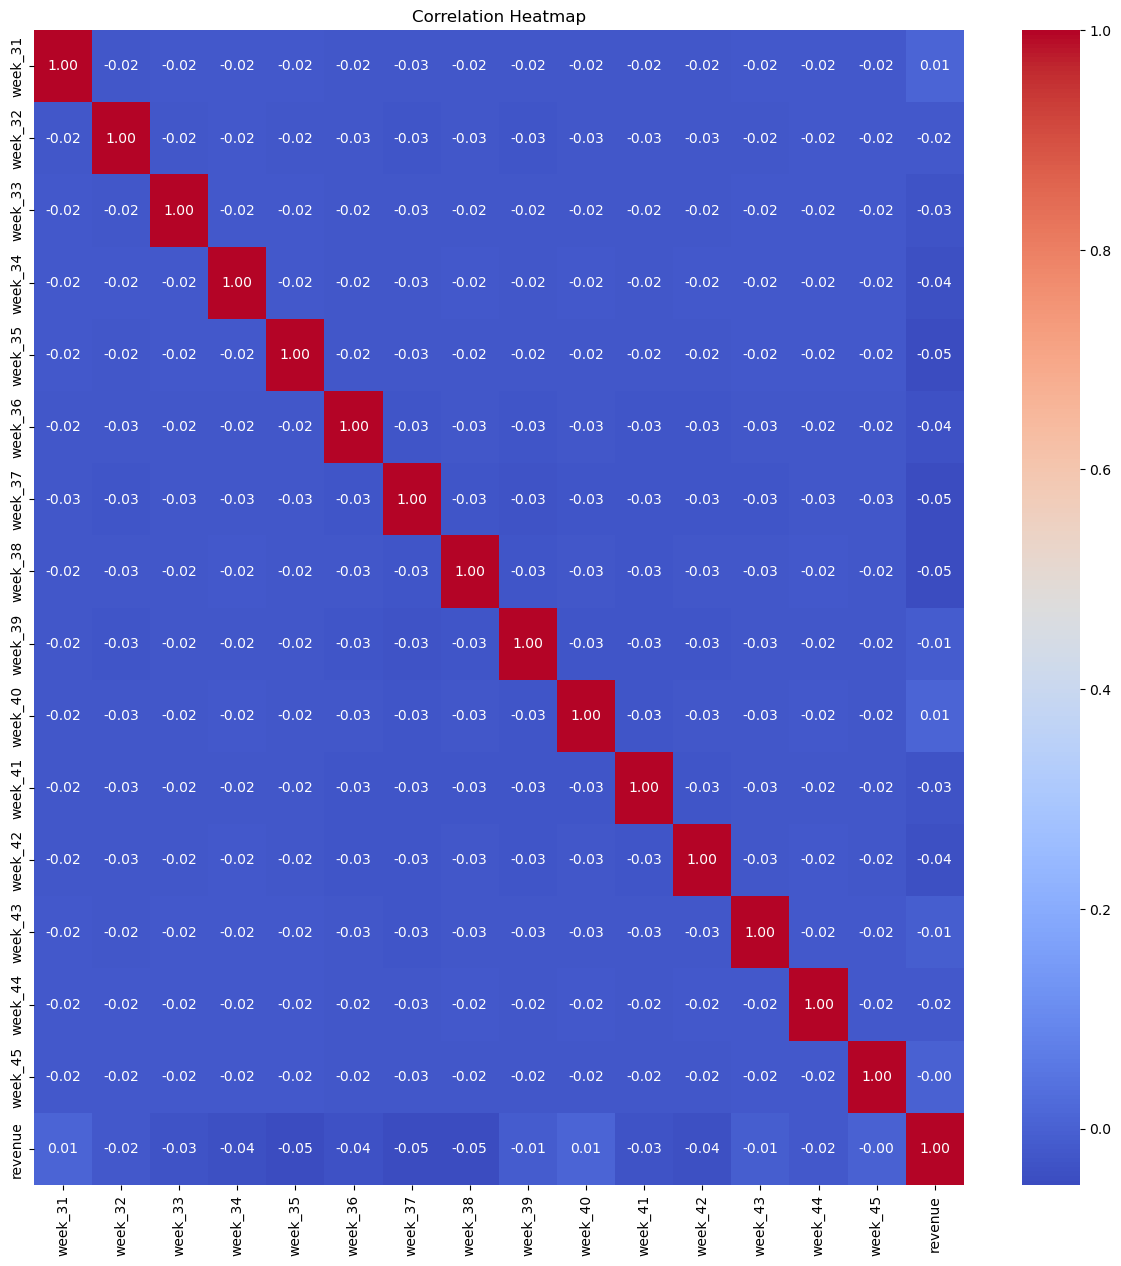

In [51]:
#Define week columns
week_columns = [col for col in featurized_df.columns if 'week_' in col]
week_columns = week_columns[30:45]
week_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,week_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

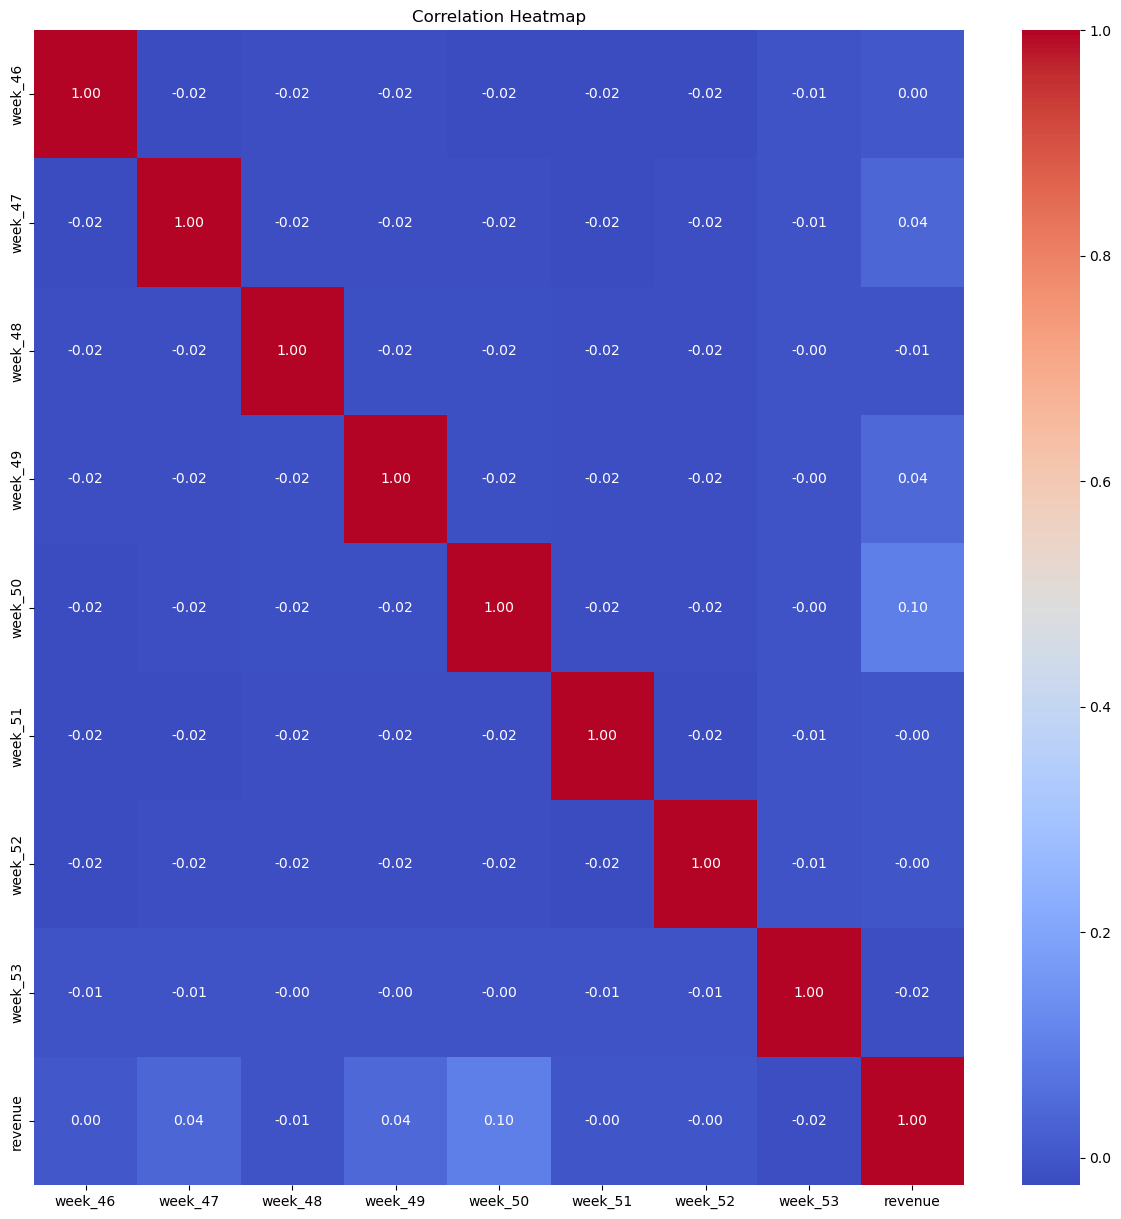

In [52]:
#Define week columns
week_columns = [col for col in featurized_df.columns if 'week_' in col]
week_columns = week_columns[45:]
week_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,week_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [53]:
#Filter encoded features from 'season' based on correlation threshold of 0.05
filter_correlation(featurized_df,'week_',0.05)

['week_17', 'week_21', 'week_24', 'week_26', 'week_35', 'week_50']

### Weekday

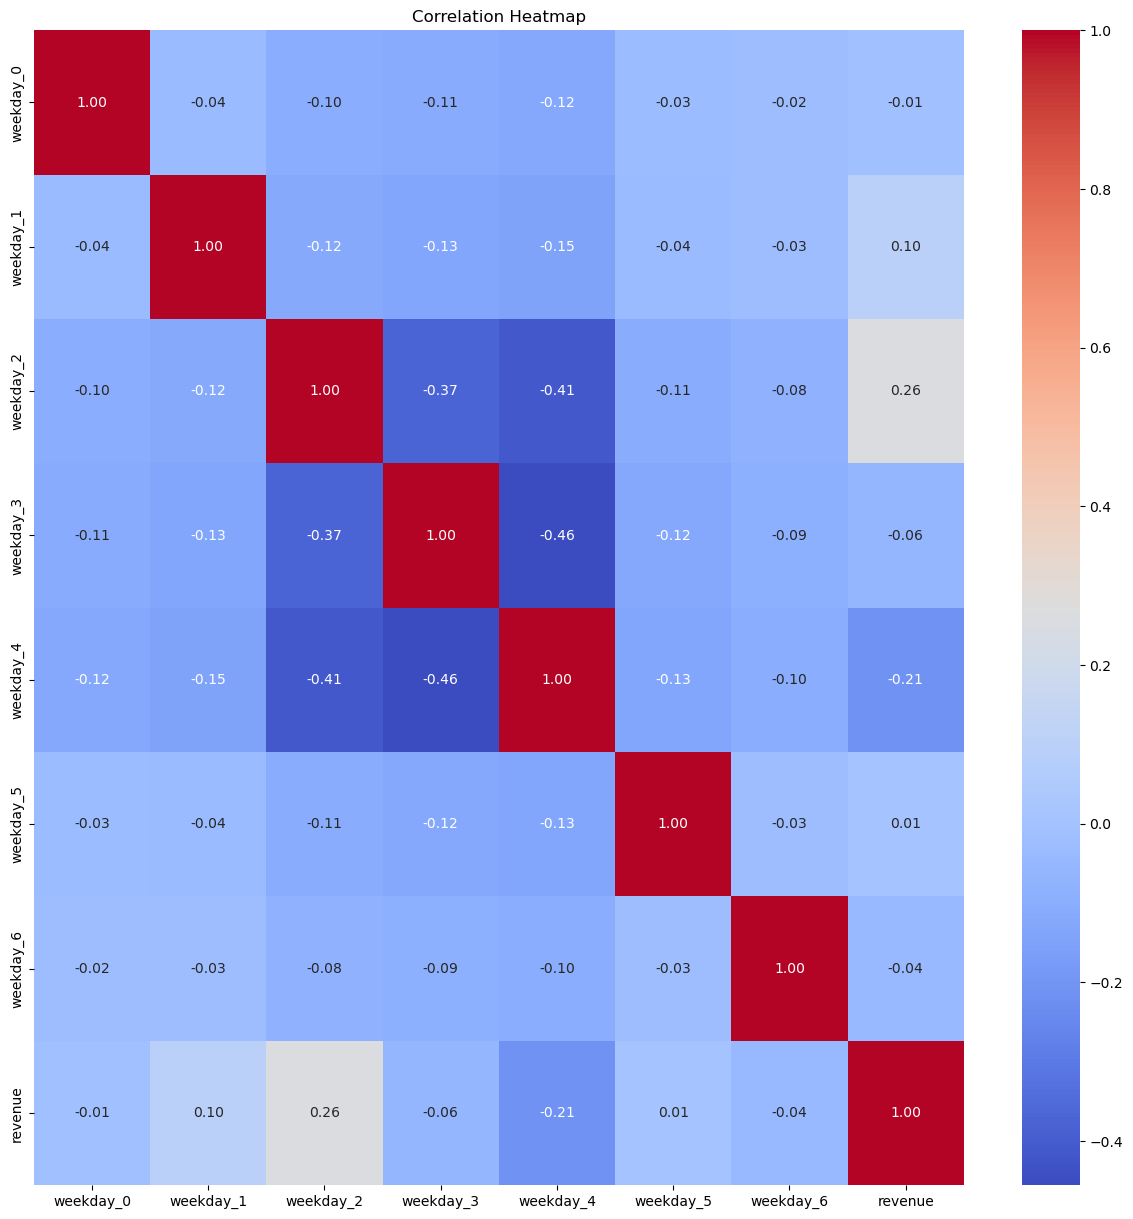

In [54]:
#Define week columns
weekday_columns = [col for col in featurized_df.columns if 'weekday' in col]
weekday_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(15,15))
correlation_matrix = featurized_df.loc[:,weekday_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [55]:
#Filter encoded features from 'season' based on correlation threshold of 0.05
filter_correlation(featurized_df,'weekday',0.05)

['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4']

### Season

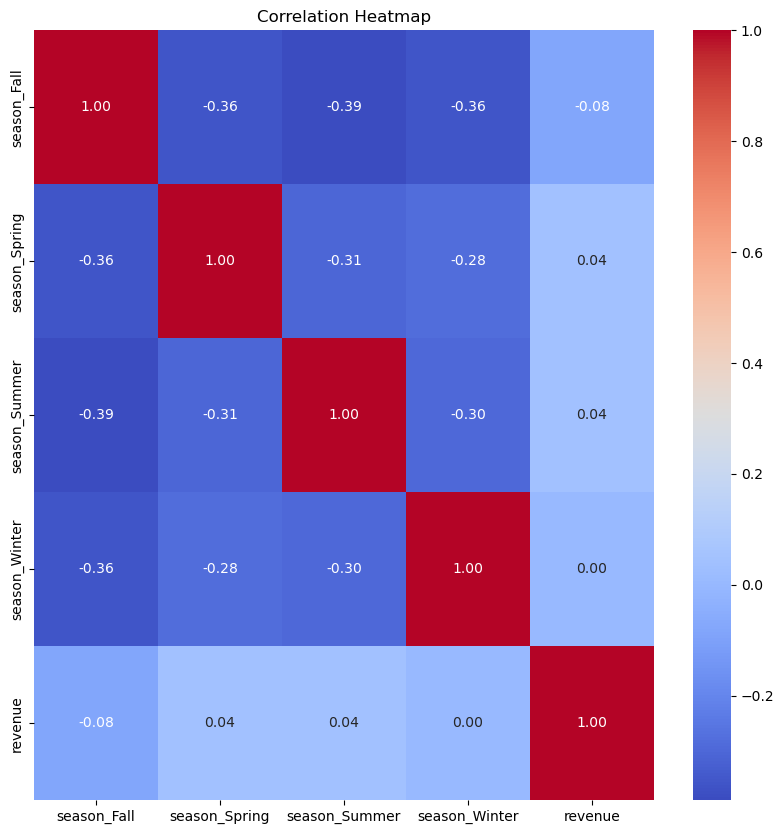

In [56]:
#Define Season columns
season_columns = [col for col in featurized_df.columns if 'season' in col]
season_columns.append('revenue')

# Plot Heatmap
plt.figure(figsize=(10,10))
correlation_matrix = featurized_df.loc[:,season_columns].corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [57]:
#Filter encoded features from 'season' based on correlation threshold of 0.05
filter_correlation(featurized_df,'season_',0.05)

['season_Fall']

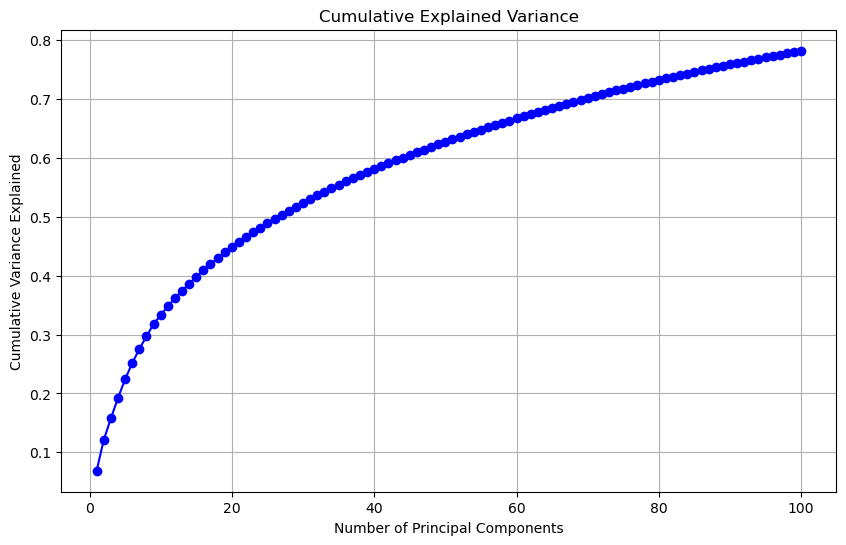

In [58]:
#Try PCA on word embeddings
embedding_columns = [x for x in featurized_df.columns if 'embed' in x]
pca = PCA(n_components=100)
pca.fit(featurized_df.loc[:,embedding_columns])
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

## Feature selection

In [59]:
#Filter the rows in processed_df based on the conditions
processed_df = processed_df[~((processed_df['revenue']<10000)|
                              (processed_df['revenue']<processed_df['gross_earnings_domestic']))]
processed_df['ROI']=((processed_df['revenue']-processed_df['budget'])/processed_df['budget'])
max_roi_index = processed_df['ROI'].idxmax()

# Drop the row with the maximum "ROI" from the DataFrame
processed_df.drop(max_roi_index, inplace=True)

processed_df = processed_df.drop(columns=['gross_earnings_domestic','earnings_per_theatre'])

In [60]:
#Replace 0 in budget with nan
processed_df['budget'] = processed_df['budget'].replace(0,np.nan)

In [61]:
#Train test split
train,test = train_test_split(processed_df,test_size=0.3,random_state=0)

#Featurize training and testing features
train = featurize(train)
test = featurize(test)

#Separate target and features from dataset
y_train = train[['revenue']]
y_test = test[['revenue']]
X_train = train.drop(columns=['revenue'])
X_test = test.drop(columns=['revenue'])

#Initialize empty dataframe to store final training and testing features
X_train_final = pd.DataFrame()
X_test_final = pd.DataFrame()

In [62]:
#PCA on word embeddings
embedding_columns = [x for x in X_train.columns if 'embed' in x]
pca = PCA(n_components=100)
pca.fit(X_train.loc[:,embedding_columns])

#Define columns for new transformed word embedding features
pca_columns = [f'word_embed_PC{i+1}' for i in range(pca.transform(X_train.loc[:,embedding_columns]).shape[1])]

train_pca = pd.DataFrame(data=pca.transform(X_train.loc[:,embedding_columns]),columns=pca_columns,index=X_train.index)
test_pca = pd.DataFrame(data=pca.transform(X_test.loc[:,embedding_columns]),columns=pca_columns,index=X_test.index)

#Concat tranformed features to final features
X_train_final = pd.concat([X_train_final,train_pca],axis=1)
X_test_final = pd.concat([X_test_final,test_pca],axis=1)

In [63]:
#Define list of numerical features
num_features = processed_df.select_dtypes(include=['int64','float64']).columns.tolist()
num_features.remove('revenue')
num_features.remove('vote_average')
num_features.remove('vote_count')
num_features += ['mean_cast_frequency','mean_prod_countries_frequency','mean_prod_companies_frequency','num_languages']

#KNNImpute nan values in column 'budget'
imputer = KNNImputer(n_neighbors=2)
imputer.fit(X_train.loc[:,num_features])
X_train[num_features] = imputer.transform(X_train.loc[:,num_features])
X_test[num_features] = imputer.transform(X_test.loc[:,num_features])

In [64]:
#Scale numerical features
scaler = MinMaxScaler()
scaler.fit(X_train.loc[:,num_features].copy())

X_train_num_scaled = pd.DataFrame(data=scaler.transform(X_train.loc[:,num_features]),columns=num_features,index=X_train.index)
X_test_num_scaled = pd.DataFrame(data=scaler.transform(X_test.loc[:,num_features]),columns=num_features,index=X_test.index)

#Add numerical features to final features
X_train_final = pd.concat([X_train_final,X_train_num_scaled],axis=1)
X_test_final = pd.concat([X_test_final,X_test_num_scaled],axis=1)

In [65]:
#Get encoded categorical features that will be selected before RFECV
cat_columns_train = filter_correlation(train,'genres',0.1)

for i in ['production_','spoken_','original','Year','month','season']:
    cat_columns_train += filter_correlation(train,i,0.05)

cat_columns_final = list(set(cat_columns_train).intersection(X_test.columns))

X_train_final = pd.concat([X_train_final,X_train.loc[:,cat_columns_final]],axis=1)
X_test_final = pd.concat([X_test_final,X_test.loc[:,cat_columns_final]],axis=1)

In [ ]:
estimator = RandomForestRegressor()
selector = RFECV(estimator, step=2, cv=5)
selector = selector.fit(X_train_final, y_train.values.ravel())
best_features = X_train_final.columns[selector.get_support()].tolist()

## Model

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_final,y_train.values.ravel())

In [ ]:
best_features = X_train_final.columns[selector.get_support()].tolist()
best_features

## Hyperparameter Tuning

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create a GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gbr_model, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)
grid_search.fit(X_train_final.loc[:,best_features],
                y_train.values.ravel())

In [ ]:
grid_search.best_params_

## Test results

In [ ]:
R2 = r2_score(y_test.values.ravel(), gbr.predict(X_test_final))
MSE = mean_squared_error(y_test.values.ravel(), gbr.predict(X_test_final))
print(f'Test Results before feature selection\nMSE: {MSE}\nR2 score: {R2}')

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_final.loc[:,best_features],y_train.values.ravel())

R2_FS = r2_score(y_test.values.ravel(), gbr.predict(X_test_final.loc[:,best_features]))
MSE_FS = mean_squared_error(y_test.values.ravel(), gbr.predict(X_test_final.loc[:,best_features]))
print(f'Test Results after feature selection\nMSE: {MSE_FS}\nR2 score: {R2_FS}')

In [ ]:
R2_HT = r2_score(y_test.values.ravel(),
                 grid_search.predict(X_test_final.loc[:,best_features]))
MSE_HT = mean_squared_error(y_test.values.ravel(),
                            grid_search.predict(X_test_final.loc[:,best_features]))

print(f'Test Results after feature selection\nMSE: {MSE_HT}\nR2 score: {R2_HT}')

In [ ]:
# Get feature importances from the trained model
feature_importances_FS = gbr.feature_importances_

# Sort indices and feature importances
indices_FS = np.argsort(feature_importances_FS)[::1]
feature_names = X_train_final.loc[:,best_features].columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances_FS[indices_FS], align="center",color='blue',label='Set1')
plt.yticks(range(len(feature_names)), feature_names[indices_FS])
plt.ylabel("Feature",fontsize=12)
plt.xlabel("Importance",fontsize=12)
plt.title("Feature Importance of Gradient Boosted Regressor",fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Get feature importances from the trained model
feature_importances_HT = grid_search.best_estimator_.feature_importances_

# Sort indices and feature importances
indices_HT = np.argsort(feature_importances_HT)[::1]
feature_names = X_train_final.loc[:,best_features].columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances_HT[indices_HT], align="center",color='blue')
plt.yticks(range(len(feature_names)), feature_names[indices_HT])
plt.ylabel("Feature",fontsize=12)
plt.xlabel("Importance",fontsize=12)
plt.title("Feature Importance of Gradient Boosted Regressor with optimal hyperparameters",fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Plot the feature importances
plt.figure(figsize=(12,6))
plt.barh(range(len(feature_names)), feature_importances_FS[indices_FS], align="center",color='blue',label='not tuned')
plt.barh(range(len(feature_names)), feature_importances_HT[indices_HT], align="center", color='orange', label='hyperparameter tuned',alpha=0.7)
plt.yticks(range(len(feature_names)), feature_names[indices])
plt.ylabel("Feature",fontsize=12)
plt.xlabel("Importance",fontsize=12)
plt.title("Feature Importance of Gradient Boosted Regressor",fontsize=12)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Assuming y_actual and y_pred are your actual and predicted values
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x = y_train.values.ravel(), y = gbr.predict(X_train_final),ax=ax[0])
ax[0].plot([min(y_train.values.ravel()), max(y_train.values.ravel())], [min(y_train.values.ravel()), max(y_train.values.ravel())], linestyle='--', color='red', label='x=y line')
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('Train: Actual vs. Predicted Values')

sns.scatterplot(x = y_test.values.ravel(), y = gbr.predict(X_test_final),ax=ax[1])
ax[1].plot([min(y_train.values.ravel()), max(y_train.values.ravel())], [min(y_train.values.ravel()), max(y_train.values.ravel())], linestyle='--', color='red', label='x=y line')
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Predicted Values')
ax[1].set_title('Test: Actual vs. Predicted Values')

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

residuals_train = y_train.values.ravel() - gbr.predict(X_train_final.loc[:,best_features])
ax[0].scatter(gbr.predict(X_train_final.loc[:,best_features]), residuals_train)
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')
ax[0].axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
ax[0].set_title('Predicted Values vs. Residual for GBR')

residuals_test = y_test.values.ravel() - gbr.predict(X_test_final.loc[:,best_features])
ax[1].scatter(gbr.predict(X_test_final.loc[:,best_features]), residuals_test)
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
ax[1].set_title('Predicted Values vs. Residual for GBR')

# Set equal aspect ratio for both subplots
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

residuals_train = y_train.values.ravel() - gbr.predict(X_train_final.loc[:,best_features])
ax[0].scatter(y_train.values.ravel(), residuals_train)
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Residuals')
ax[0].axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
ax[0].set_title('Actual Values vs Residual for GBR')

residuals_test = y_test.values.ravel() - gbr.predict(X_test_final.loc[:,best_features])
ax[1].scatter(y_test.values.ravel(), residuals_test)
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Residuals')
ax[1].axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
ax[1].set_title('Actual Values vs Residual for GBR')

# Set equal aspect ratio for both subplots
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

plt.show()